### Model

Dynamic Demand:
- $p_t = u_t - v \sum_i q_{it}$ 
- $u_t = \rho u_{t-1} + e_t, e_t \sim N(0,\sigma)$

Walrasian 
- $\pi_w = \max_{q_i}{(p - w) q_i}$ 
- $w = u - v Q$
- $Q_w = \frac{u-w}{v}$
- $P_w = w$
- $q_w \in [0,Q_w], \pi_w = 0, \Pi_w = 0$

Nash
- $\pi_c = \max_{q_i}{(p(Q) - w) q_i}$ 
- $p(Q) - w - v q_i = 0$
- $n p(Q) = n w + v Q = n u - n v Q$
- $Q_c = \frac{n(u-w)}{v(n+1)}$
- $P_c = u - v Q$
- $q_c = Q_c/n$

Monopoly
- $\pi_m = \max_{Q}{(p(Q) - w) Q}$ 
- $p(Q)=w+vQ=u-vQ$ 
- $Q_m =\frac{u-w}{2v}$ 
- $P_m =\frac{u-w}{2v}$


In [177]:
# Parameters
u = 40
v = 1
w = 4
n = 2
sigma = 1
rho = 0.9

In [178]:
def price(Q,u,v):
    return u-v*Q

def profit(P,Q):
    return
           
class cournot:
    def __init__(self,u,v,w,n):
        self.u=u
        self.v=v
        self.w=w
        self.n=n
        self.Qw=(u-w)/v
        self.Qc=n*(u-w)/v/(n+1)
        self.Qm=(u-w)/2*v
        self.Pw = price(self.Qw,u,v)
        self.Pc = price(self.Qc,u,v)
        self.Pm = price(self.Qm,u,v)
        self.Πw = 0
        self.Πc = (self.Pc-w)*self.Qc
        self.Πm = (self.Pm-w)*self.Qm
        self.qw = self.Qw/n
        self.qc = self.Qc/n
        self.qm = self.Qm/n
        self.πw = 0
        self.πw = self.Πc/n
        self.πw = self.Πm/n
    
    def price(self,q,q_):
        return self.u-v*(q+q_)
    
    def profit(self,q,q_):
        return (self.price(q,q_)-w)*q
        
game1 = cournot(40,1,4,2)

In [179]:
game1.Qc, game1.qc, game1.Pc, game1.w, game1.Πc, game1.profit(12,12)

(24.0, 12.0, 16.0, 4, 288.0, 144)

In [180]:
game1.Qm, game1.qm, game1.Pm, game1.w, game1.Πm, game1.profit(9,9)

(18.0, 9.0, 22.0, 4, 324.0, 162)

### Shocks

In [182]:
# Input: ρ, σ, K
# Output: KxK Transition Matrix
import numpy as np
ρ, σ, K = 0.9, 0.001, 11
σy = σ/np.sqrt(1-ρ**2)
print(ρ, σ, K, σy)

import scipy.stats as stats
def tauchen(ρ, σ, K, m=3):
    Z = np.linspace(-m * σ/np.sqrt(1-ρ**2), m * σ/np.sqrt(1-ρ**2), K) # Shock Space
    F = lambda x: stats.norm.cdf(x, 0, σ) # CDF Function for Standard Normal
    α = Z[2] - Z[1] # Step Size
    P = np.zeros((K,K)) # Placeholder Transition Matrix
    # P[i,j] is probability of process going from Zi to Zj 
    for i in range(K):
        for j in range(K):
            if j == 1:
                P[i, j] = F(Z[j]+α/2-ρ*Z[i])
            elif j == K:
                P[i, j] = 1 - F(Z[j]-α/2-ρ*Z[i])
            else:
                P[i, j] = F(Z[j]+α/2-ρ*Z[i]) - F(Z[j]-α/2-ρ*Z[i])
        P[i, :] = P[i, :]/sum(P[i, :])
    return Z, α, F, P
        
Z, α, F, P = tauchen(ρ, σ, K, m=3)
np.round(P,2)
np.round(Z,3

0.9 0.001 11 0.002294157338705618


array([-6.88247202e-03, -5.50597761e-03, -4.12948321e-03, -2.75298881e-03,
       -1.37649440e-03, -8.67361738e-19,  1.37649440e-03,  2.75298881e-03,
        4.12948321e-03,  5.50597761e-03,  6.88247202e-03])

In [119]:
import numpy as np
rho = 0.99
sigma = 0.1
u_ = 40
e = np.random.normal(1)*sigma
shock_space = np.linspace(u_-2*sigma/np.sqrt(1-rho**2),u_+2*sigma/np.sqrt(1-rho**2),10)
for u in shock_space:
    print(u,cournot(u,v,w,n).profit(12,12))

38.58223758998333 126.98685107979995
38.89729590332037 130.76755083984443
39.2123542166574 134.54825059988883
39.52741252999444 138.32895035993332
39.84247084333148 142.1096501199778
40.15752915666852 145.8903498800222
40.47258747000556 149.67104964006668
40.7876457833426 153.45174940011117
41.10270409667963 157.23244916015557
41.41776241001667 161.01314892020005


In [120]:
sigma/(1-rho)
np.linspace(u_-2*sigma/(1-rho),u_+2*sigma/(1-rho),10)

array([20.        , 24.44444444, 28.88888889, 33.33333333, 37.77777778,
       42.22222222, 46.66666667, 51.11111111, 55.55555556, 60.        ])

In [121]:
shock_space[5]

40.15752915666852

### Q-Learning

In [156]:
import random
import numpy as np

# initialize Boltzmann Q-learning parameters
gamma = 0.9
alpha = 0.1
initial_temperature = 1.0
temperature_decay = 0.9999
min_temperature = 0.001
temperature = initial_temperature

initial_eps = 1.0
eps_decay = 0.9999
min_eps = 0.001
eps = initial_eps

u_ = shock_space[5]
e = np.random.normal(1)*sigma

# define the Boltzmann action selection function
def boltzmann_action_selection(Q, state, temperature):
    # compute the modified probabilities of each action using the Boltzmann distribution
    max_Q = np.max(Q[state])
    logits = (Q[state] - max_Q) / temperature
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits)
    # select an action using the computed probabilities
    action = np.random.choice(range(len(probs)), p=probs)
    return action

# initialize the Q-table
game = game1
num_states1 = 10
num_states2 = 10
num_actions = 10
Q1 = np.ones((num_states1*num_states2, num_actions))
Q2 = np.ones((num_states1*num_states2, num_actions))
q1_history = []
q2_history = []
u_history = []
action2quantity = np.linspace(game.qc*0.8,game.qm*1.2,num_actions)

In [157]:
# run Boltzmann Q-learning for a fixed number of episodes
# initialize the state
u_ = shock_space[5]
e = np.random.normal(1)*sigma
state1 = 0
state2 = 0
num_episodes = 100000
for episode in range(num_episodes):
    u = 4 + rho * u_ + np.random.normal(1)*sigma
    u_idx = np.argmin(np.abs(shock_space -u))
    u_history.append(u)
    
    if np.random.uniform()>eps:
        # select an action using Boltzmann action selection
        action1 = boltzmann_action_selection(Q1, state1,temperature)
    else:
        action1 = np.random.choice(range(num_actions))

    if np.random.uniform()>eps:
        # select an action using Boltzmann action selection
        action2 = boltzmann_action_selection(Q2, state2,temperature)
    else:
        action2 = np.random.choice(range(num_actions))

    quantity1 = action2quantity[action1]
    quantity2 = action2quantity[action2]

    # take the selected action and observe the next state and reward
    next_state1 = 10*action2+u_idx
    next_state2 = 10*action1+u_idx

    # rewards
    reward1 = cournot(u,v,w,n).profit(quantity1,quantity2)
    reward2 = cournot(u,v,w,n).profit(quantity2,quantity1)

    # update the Q-value for the selected action in the current state
    Q1[state1][action1] =  (1-alpha)*Q1[state1][action1] + alpha * (reward1 + gamma * np.max(Q1[next_state1]))
    Q2[state2][action2] =  (1-alpha)*Q2[state2][action2] + alpha * (reward2 + gamma * np.max(Q2[next_state2]))

    # move to the next state
    state1 = next_state1
    state2 = next_state2
    u_ = u

    # update temperature
    temperature = max(min_temperature, temperature * temperature_decay)
    eps = max(min_eps, eps * eps_decay)

    print(quantity1, quantity2, temperature, eps)
    
    q1_history.append(quantity1)
    q2_history.append(quantity2)

10.133333333333333 10.0 0.9999 0.9999
10.4 10.533333333333333 0.9998000100000001 0.9998000100000001
10.4 10.133333333333333 0.9997000299990001 0.9997000299990001
10.0 10.799999999999999 0.9996000599960002 0.9996000599960002
9.600000000000001 10.4 0.9995000999900007 0.9995000999900007
10.4 9.866666666666667 0.9994001499800017 0.9994001499800017
10.533333333333333 10.4 0.9993002099650037 0.9993002099650037
9.733333333333334 10.133333333333333 0.9992002799440072 0.9992002799440072
9.600000000000001 10.0 0.9991003599160128 0.9991003599160128
10.533333333333333 9.866666666666667 0.9990004498800211 0.9990004498800211
9.866666666666667 9.733333333333334 0.9989005498350332 0.9989005498350332
10.666666666666666 10.0 0.9988006597800497 0.9988006597800497
10.533333333333333 10.799999999999999 0.9987007797140718 0.9987007797140718
10.133333333333333 10.533333333333333 0.9986009096361004 0.9986009096361004
9.733333333333334 10.799999999999999 0.9985010495451367 0.9985010495451367
9.600000000000001 

10.133333333333333 10.666666666666666 0.7268639549608542 0.7268639549608542
10.133333333333333 10.0 0.7267912685653581 0.7267912685653581
10.533333333333333 10.266666666666667 0.7267185894385016 0.7267185894385016
10.799999999999999 10.4 0.7266459175795578 0.7266459175795578
9.600000000000001 10.133333333333333 0.7265732529877998 0.7265732529877998
10.0 9.866666666666667 0.726500595662501 0.726500595662501
10.666666666666666 10.266666666666667 0.7264279456029348 0.7264279456029348
10.799999999999999 10.666666666666666 0.7263553028083745 0.7263553028083745
9.600000000000001 10.533333333333333 0.7262826672780937 0.7262826672780937
10.666666666666666 10.0 0.7262100390113658 0.7262100390113658
10.266666666666667 10.666666666666666 0.7261374180074647 0.7261374180074647
10.0 10.0 0.7260648042656639 0.7260648042656639
10.533333333333333 10.533333333333333 0.7259921977852374 0.7259921977852374
10.266666666666667 9.600000000000001 0.7259195985654588 0.7259195985654588
10.0 10.799999999999999 0.

9.600000000000001 10.4 0.6626418860884362 0.6626418860884362
9.600000000000001 10.533333333333333 0.6625756218998273 0.6625756218998273
10.133333333333333 9.866666666666667 0.6625093643376373 0.6625093643376373
9.866666666666667 10.666666666666666 0.6624431134012035 0.6624431134012035
10.799999999999999 10.266666666666667 0.6623768690898635 0.6623768690898635
10.133333333333333 9.733333333333334 0.6623106314029545 0.6623106314029545
10.0 10.666666666666666 0.6622444003398142 0.6622444003398142
10.0 10.266666666666667 0.6621781758997802 0.6621781758997802
10.799999999999999 10.799999999999999 0.6621119580821903 0.6621119580821903
10.666666666666666 10.266666666666667 0.6620457468863821 0.6620457468863821
10.0 10.666666666666666 0.6619795423116934 0.6619795423116934
10.4 10.133333333333333 0.6619133443574623 0.6619133443574623
10.666666666666666 10.266666666666667 0.6618471530230265 0.6618471530230265
10.799999999999999 9.866666666666667 0.6617809683077243 0.6617809683077243
10.0 9.73333

10.799999999999999 9.733333333333334 0.6033696440554112 0.6033696440554112
10.799999999999999 10.0 0.6033093070910056 0.6033093070910056
10.533333333333333 10.0 0.6032489761602965 0.6032489761602965
10.533333333333333 10.533333333333333 0.6031886512626805 0.6031886512626805
10.799999999999999 9.600000000000001 0.6031283323975543 0.6031283323975543
10.133333333333333 10.266666666666667 0.6030680195643146 0.6030680195643146
10.266666666666667 10.666666666666666 0.6030077127623581 0.6030077127623581
10.799999999999999 10.4 0.6029474119910818 0.6029474119910818
10.266666666666667 9.600000000000001 0.6028871172498828 0.6028871172498828
10.4 10.133333333333333 0.6028268285381577 0.6028268285381577
9.600000000000001 10.533333333333333 0.6027665458553039 0.6027665458553039
9.733333333333334 10.266666666666667 0.6027062692007183 0.6027062692007183
9.866666666666667 10.533333333333333 0.6026459985737983 0.6026459985737983
10.266666666666667 10.799999999999999 0.6025857339739409 0.602585733973940

9.600000000000001 10.266666666666667 0.5688558552691679 0.5688558552691679
10.799999999999999 10.266666666666667 0.5687989696836411 0.5687989696836411
10.799999999999999 9.600000000000001 0.5687420897866727 0.5687420897866727
10.133333333333333 10.0 0.568685215577694 0.568685215577694
10.666666666666666 9.733333333333334 0.5686283470561363 0.5686283470561363
10.266666666666667 10.533333333333333 0.5685714842214307 0.5685714842214307
10.799999999999999 10.4 0.5685146270730085 0.5685146270730085
9.600000000000001 10.0 0.5684577756103012 0.5684577756103012
10.533333333333333 10.799999999999999 0.5684009298327402 0.5684009298327402
10.533333333333333 10.133333333333333 0.5683440897397569 0.5683440897397569
10.666666666666666 9.600000000000001 0.568287255330783 0.568287255330783
10.4 10.533333333333333 0.5682304266052499 0.5682304266052499
10.666666666666666 10.0 0.5681736035625894 0.5681736035625894
10.533333333333333 10.666666666666666 0.5681167862022332 0.5681167862022332
10.0 9.60000000

10.533333333333333 10.266666666666667 0.5539784278074307 0.5539784278074307
10.266666666666667 9.600000000000001 0.5539230299646499 0.5539230299646499
10.266666666666667 10.133333333333333 0.5538676376616535 0.5538676376616535
10.4 10.533333333333333 0.5538122508978873 0.5538122508978873
10.666666666666666 10.666666666666666 0.5537568696727976 0.5537568696727976
10.0 10.533333333333333 0.5537014939858304 0.5537014939858304
10.666666666666666 10.666666666666666 0.5536461238364317 0.5536461238364317
10.533333333333333 10.666666666666666 0.5535907592240481 0.5535907592240481
10.533333333333333 9.866666666666667 0.5535354001481257 0.5535354001481257
10.666666666666666 10.4 0.5534800466081109 0.5534800466081109
9.866666666666667 10.666666666666666 0.5534246986034501 0.5534246986034501
10.0 10.266666666666667 0.5533693561335897 0.5533693561335897
10.799999999999999 10.266666666666667 0.5533140191979764 0.5533140191979764
10.533333333333333 9.733333333333334 0.5532586877960566 0.5532586877960

10.533333333333333 10.666666666666666 0.5260641491397398 0.5260641491397398
10.0 9.600000000000001 0.5260115427248258 0.5260115427248258
10.4 10.533333333333333 0.5259589415705532 0.5259589415705532
10.666666666666666 10.799999999999999 0.5259063456763962 0.5259063456763962
10.666666666666666 10.666666666666666 0.5258537550418285 0.5258537550418285
10.0 9.733333333333334 0.5258011696663244 0.5258011696663244
9.600000000000001 10.266666666666667 0.5257485895493578 0.5257485895493578
9.733333333333334 9.600000000000001 0.5256960146904028 0.5256960146904028
10.666666666666666 9.600000000000001 0.5256434450889338 0.5256434450889338
10.133333333333333 10.799999999999999 0.525590880744425 0.525590880744425
9.600000000000001 10.666666666666666 0.5255383216563505 0.5255383216563505
10.0 10.4 0.5254857678241849 0.5254857678241849
9.600000000000001 10.266666666666667 0.5254332192474025 0.5254332192474025
10.799999999999999 10.266666666666667 0.5253806759254778 0.5253806759254778
10.7999999999999

10.0 10.4 0.48112095132103044 0.48112095132103044
9.600000000000001 10.266666666666667 0.48107283922589833 0.48107283922589833
9.733333333333334 10.266666666666667 0.48102473194197576 0.48102473194197576
10.266666666666667 10.0 0.48097662946878156 0.48097662946878156
10.799999999999999 10.4 0.48092853180583467 0.48092853180583467
9.600000000000001 10.0 0.4808804389526541 0.4808804389526541
10.533333333333333 10.266666666666667 0.4808323509087588 0.4808323509087588
9.600000000000001 9.600000000000001 0.48078426767366794 0.48078426767366794
10.666666666666666 9.866666666666667 0.4807361892469006 0.4807361892469006
10.666666666666666 10.666666666666666 0.4806881156279759 0.4806881156279759
10.266666666666667 10.666666666666666 0.48064004681641315 0.48064004681641315
10.0 10.4 0.4805919828117315 0.4805919828117315
10.533333333333333 10.266666666666667 0.48054392361345033 0.48054392361345033
9.600000000000001 9.866666666666667 0.480495869221089 0.480495869221089
10.666666666666666 10.533333

10.666666666666666 10.533333333333333 0.4359875863262917 0.4359875863262917
9.600000000000001 10.666666666666666 0.43594398756765906 0.43594398756765906
9.600000000000001 10.266666666666667 0.4359003931689023 0.4359003931689023
10.799999999999999 10.266666666666667 0.4358568031295854 0.4358568031295854
10.799999999999999 10.266666666666667 0.4358132174492725 0.4358132174492725
10.799999999999999 10.0 0.43576963612752756 0.43576963612752756
9.866666666666667 9.600000000000001 0.4357260591639148 0.4357260591639148
10.133333333333333 10.266666666666667 0.43568248655799846 0.43568248655799846
10.0 10.666666666666666 0.43563891830934265 0.43563891830934265
10.0 10.266666666666667 0.43559535441751174 0.43559535441751174
9.600000000000001 10.799999999999999 0.43555179488206996 0.43555179488206996
10.666666666666666 10.0 0.4355082397025818 0.4355082397025818
10.4 10.133333333333333 0.43546468887861156 0.43546468887861156
10.666666666666666 10.266666666666667 0.4354211424097237 0.43542114240972

10.799999999999999 10.666666666666666 0.40194276623928943 0.40194276623928943
10.666666666666666 10.0 0.4019025719626655 0.4019025719626655
10.533333333333333 9.600000000000001 0.40186238170546923 0.40186238170546923
10.133333333333333 9.600000000000001 0.4018221954672987 0.4018221954672987
9.866666666666667 10.666666666666666 0.401782013247752 0.401782013247752
10.0 10.266666666666667 0.4017418350464272 0.4017418350464272
10.799999999999999 10.666666666666666 0.4017016608629225 0.4017016608629225
10.0 10.266666666666667 0.40166149069683627 0.40166149069683627
10.266666666666667 9.600000000000001 0.4016213245477666 0.4016213245477666
9.866666666666667 10.133333333333333 0.40158116241531183 0.40158116241531183
10.133333333333333 10.266666666666667 0.4015410042990703 0.4015410042990703
10.799999999999999 9.600000000000001 0.4015008501986404 0.4015008501986404
10.133333333333333 10.0 0.40146070011362056 0.40146070011362056
10.533333333333333 10.666666666666666 0.4014205540436092 0.4014205

10.0 10.266666666666667 0.3702970812147337 0.3702970812147337
10.0 9.733333333333334 0.37026005150661223 0.37026005150661223
10.799999999999999 9.733333333333334 0.3702230255014616 0.3702230255014616
10.799999999999999 9.866666666666667 0.37018600319891143 0.37018600319891143
10.666666666666666 10.0 0.3701489845985915 0.3701489845985915
10.533333333333333 10.666666666666666 0.37011196970013166 0.37011196970013166
9.866666666666667 9.600000000000001 0.37007495850316163 0.37007495850316163
10.799999999999999 10.133333333333333 0.3700379510073113 0.3700379510073113
10.666666666666666 10.0 0.37000094721221055 0.37000094721221055
10.533333333333333 10.533333333333333 0.3699639471174893 0.3699639471174893
10.666666666666666 10.533333333333333 0.3699269507227776 0.3699269507227776
10.666666666666666 10.666666666666666 0.3698899580277053 0.3698899580277053
9.733333333333334 10.666666666666666 0.3698529690319025 0.3698529690319025
10.799999999999999 10.799999999999999 0.3698159837349993 0.36981

10.799999999999999 10.666666666666666 0.3424417928615381 0.3424417928615381
9.733333333333334 10.0 0.3424075486822519 0.3424075486822519
10.533333333333333 9.600000000000001 0.3423733079273837 0.3423733079273837
10.133333333333333 10.533333333333333 0.34233907059659097 0.34233907059659097
10.266666666666667 10.666666666666666 0.3423048366895313 0.3423048366895313
10.0 10.4 0.34227060620586236 0.34227060620586236
10.133333333333333 10.266666666666667 0.3422363791452418 0.3422363791452418
9.866666666666667 10.133333333333333 0.3422021555073273 0.3422021555073273
10.666666666666666 10.266666666666667 0.3421679352917766 0.3421679352917766
10.799999999999999 10.666666666666666 0.3421337184982474 0.3421337184982474
10.0 10.0 0.3420995051263976 0.3420995051263976
10.533333333333333 10.4 0.34206529517588496 0.34206529517588496
9.866666666666667 9.600000000000001 0.3420310886463674 0.3420310886463674
10.133333333333333 9.866666666666667 0.34199688553750274 0.34199688553750274
10.666666666666666

10.799999999999999 10.266666666666667 0.3147873983631231 0.3147873983631231
10.799999999999999 10.0 0.31475591962328675 0.31475591962328675
10.533333333333333 10.0 0.31472444403132444 0.31472444403132444
10.533333333333333 9.600000000000001 0.31469297158692133 0.31469297158692133
9.600000000000001 10.133333333333333 0.31466150228976264 0.31466150228976264
10.666666666666666 10.266666666666667 0.31463003613953366 0.31463003613953366
10.799999999999999 10.666666666666666 0.3145985731359197 0.3145985731359197
10.0 10.0 0.31456711327860615 0.31456711327860615
10.533333333333333 10.266666666666667 0.3145356565672783 0.3145356565672783
10.533333333333333 9.733333333333334 0.3145042030016216 0.3145042030016216
10.266666666666667 9.600000000000001 0.3144727525813214 0.3144727525813214
10.133333333333333 10.4 0.3144413053060633 0.3144413053060633
10.266666666666667 10.799999999999999 0.3144098611755327 0.3144098611755327
10.666666666666666 10.4 0.31437842018941514 0.31437842018941514
9.60000000

10.0 10.666666666666666 0.2881822434699092 0.2881822434699092
10.0 10.266666666666667 0.28815342524556226 0.28815342524556226
10.799999999999999 10.266666666666667 0.2881246099030377 0.2881246099030377
10.799999999999999 10.799999999999999 0.2880957974420474 0.2880957974420474
10.666666666666666 10.799999999999999 0.28806698786230317 0.28806698786230317
10.666666666666666 10.799999999999999 0.2880381811635169 0.2880381811635169
10.666666666666666 10.666666666666666 0.28800937734540055 0.28800937734540055
10.4 10.666666666666666 0.287980576407666 0.287980576407666
10.0 10.266666666666667 0.2879517783500252 0.2879517783500252
10.799999999999999 10.266666666666667 0.2879229831721902 0.2879229831721902
10.799999999999999 10.799999999999999 0.287894190873873 0.287894190873873
10.666666666666666 10.799999999999999 0.2878654014547856 0.2878654014547856
10.666666666666666 10.666666666666666 0.28783661491464013 0.28783661491464013
10.0 10.666666666666666 0.2878078312531487 0.2878078312531487
10

9.600000000000001 10.666666666666666 0.27852041628937657 0.27852041628937657
10.0 10.266666666666667 0.27849256424774765 0.27849256424774765
10.799999999999999 10.533333333333333 0.27846471499132286 0.27846471499132286
10.666666666666666 10.799999999999999 0.27843686851982374 0.27843686851982374
10.799999999999999 10.666666666666666 0.27840902483297175 0.27840902483297175
10.0 9.866666666666667 0.27838118393048844 0.27838118393048844
10.666666666666666 10.133333333333333 0.2783533458120954 0.2783533458120954
10.666666666666666 10.666666666666666 0.2783255104775142 0.2783255104775142
10.799999999999999 10.666666666666666 0.2782976779264664 0.2782976779264664
10.533333333333333 9.600000000000001 0.2782698481586738 0.2782698481586738
10.133333333333333 9.600000000000001 0.27824202117385793 0.27824202117385793
10.133333333333333 10.0 0.27821419697174055 0.27821419697174055
10.533333333333333 10.666666666666666 0.2781863755520434 0.2781863755520434
10.0 9.600000000000001 0.2781585569144882 

10.666666666666666 10.666666666666666 0.26953270156772025 0.26953270156772025
10.533333333333333 10.666666666666666 0.26950574829756346 0.26950574829756346
10.533333333333333 9.600000000000001 0.2694787977227337 0.2694787977227337
10.133333333333333 10.666666666666666 0.26945184984296144 0.26945184984296144
10.533333333333333 9.866666666666667 0.26942490465797714 0.26942490465797714
10.666666666666666 9.600000000000001 0.26939796216751133 0.26939796216751133
10.133333333333333 10.666666666666666 0.26937102237129457 0.26937102237129457
10.533333333333333 10.666666666666666 0.26934408526905745 0.26934408526905745
10.533333333333333 9.600000000000001 0.26931715086053054 0.26931715086053054
10.133333333333333 9.600000000000001 0.2692902191454445 0.2692902191454445
10.133333333333333 10.666666666666666 0.26926329012352995 0.26926329012352995
10.533333333333333 10.666666666666666 0.2692363637945176 0.2692363637945176
10.533333333333333 9.600000000000001 0.26920944015813814 0.2692094401581381

10.666666666666666 10.666666666666666 0.25320174939866646 0.25320174939866646
10.533333333333333 10.666666666666666 0.2531764292237266 0.2531764292237266
10.533333333333333 9.600000000000001 0.2531511115808042 0.2531511115808042
10.133333333333333 9.600000000000001 0.25312579646964617 0.25312579646964617
10.133333333333333 10.666666666666666 0.25310048388999923 0.25310048388999923
10.533333333333333 10.666666666666666 0.2530751738416102 0.2530751738416102
10.533333333333333 9.600000000000001 0.25304986632422605 0.25304986632422605
10.133333333333333 10.799999999999999 0.2530245613375936 0.2530245613375936
10.666666666666666 10.666666666666666 0.25299925888145985 0.25299925888145985
10.533333333333333 10.666666666666666 0.25297395895557173 0.25297395895557173
9.733333333333334 10.799999999999999 0.25294866155967616 0.25294866155967616
10.666666666666666 10.666666666666666 0.25292336669352017 0.25292336669352017
10.266666666666667 9.600000000000001 0.2528980743568508 0.2528980743568508
1

10.666666666666666 10.799999999999999 0.2423988280141297 0.2423988280141297
10.666666666666666 10.133333333333333 0.2423745881313283 0.2423745881313283
10.666666666666666 10.666666666666666 0.24235035067251517 0.24235035067251517
10.533333333333333 10.666666666666666 0.24232611563744794 0.24232611563744794
10.533333333333333 10.799999999999999 0.2423018830258842 0.2423018830258842
10.666666666666666 10.799999999999999 0.24227765283758163 0.24227765283758163
10.666666666666666 10.666666666666666 0.24225342507229786 0.24225342507229786
9.866666666666667 10.666666666666666 0.24222919972979062 0.24222919972979062
10.533333333333333 10.266666666666667 0.24220497680981765 0.24220497680981765
10.799999999999999 10.799999999999999 0.24218075631213667 0.24218075631213667
10.666666666666666 10.799999999999999 0.24215653823650546 0.24215653823650546
9.866666666666667 10.666666666666666 0.2421323225826818 0.2421323225826818
10.533333333333333 10.4 0.24210810935042354 0.24210810935042354
9.60000000

10.533333333333333 10.666666666666666 0.23361689530607885 0.23361689530607885
9.733333333333334 10.266666666666667 0.23359353361654825 0.23359353361654825
10.133333333333333 10.533333333333333 0.2335701742631866 0.2335701742631866
10.666666666666666 10.666666666666666 0.2335468172457603 0.2335468172457603
10.533333333333333 10.666666666666666 0.23352346256403572 0.23352346256403572
10.533333333333333 10.799999999999999 0.23350011021777933 0.23350011021777933
10.666666666666666 10.799999999999999 0.23347676020675756 0.23347676020675756
10.666666666666666 10.666666666666666 0.2334534125307369 0.2334534125307369
10.533333333333333 10.4 0.23343006718948384 0.23343006718948384
9.600000000000001 10.799999999999999 0.2334067241827649 0.2334067241827649
10.666666666666666 10.266666666666667 0.23338338351034663 0.23338338351034663
10.799999999999999 10.666666666666666 0.2333600451719956 0.2333600451719956
10.533333333333333 10.799999999999999 0.2333367091674784 0.2333367091674784
10.66666666666

10.799999999999999 10.666666666666666 0.215266863464946 0.215266863464946
10.799999999999999 10.799999999999999 0.2152453367785995 0.2152453367785995
10.0 10.4 0.21522381224492165 0.21522381224492165
9.600000000000001 10.4 0.21520228986369716 0.21520228986369716
9.600000000000001 10.266666666666667 0.2151807696347108 0.2151807696347108
10.799999999999999 10.266666666666667 0.21515925155774734 0.21515925155774734
10.799999999999999 10.799999999999999 0.21513773563259156 0.21513773563259156
10.666666666666666 10.799999999999999 0.2151162218590283 0.2151162218590283
10.666666666666666 10.666666666666666 0.2150947102368424 0.2150947102368424
10.266666666666667 10.666666666666666 0.2150732007658187 0.2150732007658187
10.799999999999999 10.4 0.21505169344574213 0.21505169344574213
9.600000000000001 10.799999999999999 0.21503018827639755 0.21503018827639755
10.666666666666666 9.733333333333334 0.21500868525756991 0.21500868525756991
10.4 10.666666666666666 0.21498718438904416 0.21498718438904

10.666666666666666 10.266666666666667 0.19867582445706558 0.19867582445706558
10.799999999999999 10.666666666666666 0.19865595687461987 0.19865595687461987
10.799999999999999 10.799999999999999 0.19863609127893242 0.19863609127893242
10.666666666666666 10.799999999999999 0.19861622766980452 0.19861622766980452
10.666666666666666 10.666666666666666 0.19859636604703754 0.19859636604703754
10.799999999999999 10.666666666666666 0.19857650641043284 0.19857650641043284
9.866666666666667 9.733333333333334 0.1985566487597918 0.1985566487597918
10.799999999999999 10.266666666666667 0.19853679309491581 0.19853679309491581
10.799999999999999 10.799999999999999 0.19851693941560633 0.19851693941560633
10.666666666666666 10.799999999999999 0.19849708772166477 0.19849708772166477
10.666666666666666 10.666666666666666 0.1984772380128926 0.1984772380128926
9.866666666666667 10.4 0.19845739028909132 0.19845739028909132
9.733333333333334 10.266666666666667 0.1984375445500624 0.1984375445500624
10.7999999

10.799999999999999 10.266666666666667 0.18108559830483723 0.18108559830483723
10.799999999999999 10.799999999999999 0.18106748974500675 0.18106748974500675
10.666666666666666 10.799999999999999 0.18104938299603224 0.18104938299603224
10.666666666666666 10.666666666666666 0.18103127805773264 0.18103127805773264
10.799999999999999 10.666666666666666 0.18101317492992688 0.18101317492992688
10.799999999999999 10.799999999999999 0.1809950736124339 0.1809950736124339
10.666666666666666 10.799999999999999 0.18097697410507266 0.18097697410507266
10.666666666666666 10.533333333333333 0.18095887640766214 0.18095887640766214
10.666666666666666 10.666666666666666 0.18094078052002138 0.18094078052002138
10.533333333333333 10.4 0.18092268644196938 0.18092268644196938
9.600000000000001 10.799999999999999 0.1809045941733252 0.1809045941733252
10.666666666666666 10.266666666666667 0.18088650371390785 0.18088650371390785
10.799999999999999 10.666666666666666 0.18086841506353646 0.18086841506353646
10.79

10.799999999999999 10.666666666666666 0.16569775868366837 0.16569775868366837
10.799999999999999 10.799999999999999 0.1656811889078 0.1656811889078
10.666666666666666 10.799999999999999 0.16566462078890923 0.16566462078890923
10.666666666666666 10.666666666666666 0.16564805432683033 0.16564805432683033
10.799999999999999 10.666666666666666 0.16563148952139764 0.16563148952139764
10.799999999999999 10.266666666666667 0.16561492637244551 0.16561492637244551
10.799999999999999 10.799999999999999 0.16559836487980828 0.16559836487980828
10.666666666666666 10.799999999999999 0.1655818050433203 0.1655818050433203
10.133333333333333 10.666666666666666 0.16556524686281596 0.16556524686281596
10.799999999999999 10.666666666666666 0.1655486903381297 0.1655486903381297
10.799999999999999 10.799999999999999 0.16553213546909587 0.16553213546909587
10.666666666666666 10.799999999999999 0.16551558225554897 0.16551558225554897
10.666666666666666 10.666666666666666 0.1654990306973234 0.1654990306973234


10.666666666666666 10.666666666666666 0.15530053231023003 0.15530053231023003
10.799999999999999 10.666666666666666 0.155285002256999 0.155285002256999
10.799999999999999 10.799999999999999 0.1552694737567733 0.1552694737567733
10.666666666666666 10.799999999999999 0.15525394680939764 0.15525394680939764
10.666666666666666 10.533333333333333 0.1552384214147167 0.1552384214147167
10.666666666666666 10.666666666666666 0.15522289757257524 0.15522289757257524
10.799999999999999 10.666666666666666 0.15520737528281797 0.15520737528281797
10.799999999999999 10.799999999999999 0.1551918545452897 0.1551918545452897
10.666666666666666 10.799999999999999 0.15517633535983516 0.15517633535983516
10.666666666666666 10.666666666666666 0.15516081772629917 0.15516081772629917
10.799999999999999 10.799999999999999 0.15514530164452653 0.15514530164452653
10.666666666666666 10.266666666666667 0.15512978711436207 0.15512978711436207
10.799999999999999 10.666666666666666 0.15511427413565063 0.15511427413565

10.799999999999999 10.666666666666666 0.14462708435384847 0.14462708435384847
10.799999999999999 10.799999999999999 0.14461262164541308 0.14461262164541308
10.666666666666666 10.799999999999999 0.14459816038324855 0.14459816038324855
10.133333333333333 10.666666666666666 0.14458370056721023 0.14458370056721023
9.733333333333334 10.666666666666666 0.1445692421971535 0.1445692421971535
10.799999999999999 10.533333333333333 0.14455478527293378 0.14455478527293378
9.600000000000001 10.799999999999999 0.14454032979440648 0.14454032979440648
10.666666666666666 10.266666666666667 0.14452587576142703 0.14452587576142703
10.799999999999999 10.666666666666666 0.14451142317385088 0.14451142317385088
10.799999999999999 10.666666666666666 0.1444969720315335 0.1444969720315335
10.799999999999999 10.799999999999999 0.14448252233433034 0.14448252233433034
10.666666666666666 10.799999999999999 0.14446807408209691 0.14446807408209691
10.666666666666666 10.533333333333333 0.14445362727468872 0.1444536272

10.799999999999999 10.666666666666666 0.13433744856534824 0.13433744856534824
9.600000000000001 10.799999999999999 0.1343240148204917 0.1343240148204917
10.666666666666666 10.266666666666667 0.13431058241900964 0.13431058241900964
10.799999999999999 10.666666666666666 0.13429715136076775 0.13429715136076775
10.799999999999999 10.799999999999999 0.13428372164563168 0.13428372164563168
10.666666666666666 10.799999999999999 0.13427029327346712 0.13427029327346712
10.666666666666666 10.666666666666666 0.13425686624413977 0.13425686624413977
10.799999999999999 9.866666666666667 0.13424344055751536 0.13424344055751536
10.266666666666667 10.799999999999999 0.13423001621345962 0.13423001621345962
10.666666666666666 10.4 0.13421659321183826 0.13421659321183826
9.600000000000001 9.733333333333334 0.13420317155251707 0.13420317155251707
10.799999999999999 10.266666666666667 0.1341897512353618 0.1341897512353618
10.799999999999999 10.799999999999999 0.13417633226023828 0.13417633226023828
10.66666

10.799999999999999 10.799999999999999 0.1246676220278224 0.1246676220278224
10.799999999999999 10.799999999999999 0.12465515526561963 0.12465515526561963
10.799999999999999 10.799999999999999 0.12464268975009307 0.12464268975009307
10.666666666666666 10.799999999999999 0.12463022548111806 0.12463022548111806
10.799999999999999 10.799999999999999 0.12461776245856995 0.12461776245856995
10.799999999999999 10.799999999999999 0.1246053006823241 0.1246053006823241
10.799999999999999 10.799999999999999 0.12459284015225587 0.12459284015225587
10.799999999999999 10.799999999999999 0.12458038086824065 0.12458038086824065
10.799999999999999 10.799999999999999 0.12456792283015383 0.12456792283015383
10.0 10.799999999999999 0.12455546603787082 0.12455546603787082
10.799999999999999 10.266666666666667 0.12454301049126704 0.12454301049126704
10.799999999999999 10.799999999999999 0.12453055619021791 0.12453055619021791
10.799999999999999 10.799999999999999 0.12451810313459889 0.12451810313459889
10.7

10.799999999999999 10.799999999999999 0.1146457548709699 0.1146457548709699
10.799999999999999 10.799999999999999 0.1146342902954828 0.1146342902954828
10.799999999999999 10.799999999999999 0.11462282686645325 0.11462282686645325
10.266666666666667 10.799999999999999 0.11461136458376661 0.11461136458376661
10.799999999999999 9.866666666666667 0.11459990344730824 0.11459990344730824
10.666666666666666 10.799999999999999 0.1145884434569635 0.1145884434569635
10.799999999999999 9.866666666666667 0.11457698461261781 0.11457698461261781
10.666666666666666 10.799999999999999 0.11456552691415654 0.11456552691415654
10.799999999999999 10.799999999999999 0.11455407036146513 0.11455407036146513
10.799999999999999 10.799999999999999 0.11454261495442898 0.11454261495442898
10.799999999999999 10.799999999999999 0.11453116069293354 0.11453116069293354
10.799999999999999 10.799999999999999 0.11451970757686425 0.11451970757686425
10.799999999999999 10.799999999999999 0.11450825560610657 0.114508255606

10.799999999999999 10.799999999999999 0.10506115576570887 0.10506115576570887
10.799999999999999 10.799999999999999 0.1050506496501323 0.1050506496501323
10.799999999999999 10.799999999999999 0.10504014458516729 0.10504014458516729
10.799999999999999 10.799999999999999 0.10502964057070878 0.10502964057070878
10.799999999999999 10.799999999999999 0.10501913760665171 0.10501913760665171
10.799999999999999 10.799999999999999 0.10500863569289105 0.10500863569289105
10.799999999999999 10.799999999999999 0.10499813482932177 0.10499813482932177
10.799999999999999 10.666666666666666 0.10498763501583884 0.10498763501583884
10.799999999999999 10.799999999999999 0.10497713625233726 0.10497713625233726
10.799999999999999 10.533333333333333 0.10496663853871203 0.10496663853871203
10.666666666666666 10.799999999999999 0.10495614187485816 0.10495614187485816
10.799999999999999 10.799999999999999 0.10494564626067068 0.10494564626067068
10.799999999999999 10.799999999999999 0.10493515169604462 0.104935

9.866666666666667 10.666666666666666 0.10074983079102262 0.10074983079102262
10.799999999999999 10.266666666666667 0.10073975580794352 0.10073975580794352
10.799999999999999 10.4 0.10072968183236272 0.10072968183236272
9.600000000000001 10.799999999999999 0.10071960886417948 0.10071960886417948
10.799999999999999 10.266666666666667 0.10070953690329307 0.10070953690329307
10.799999999999999 10.799999999999999 0.10069946594960275 0.10069946594960275
10.799999999999999 10.799999999999999 0.10068939600300779 0.10068939600300779
10.799999999999999 10.799999999999999 0.10067932706340749 0.10067932706340749
10.799999999999999 10.799999999999999 0.10066925913070114 0.10066925913070114
10.799999999999999 10.799999999999999 0.10065919220478807 0.10065919220478807
10.799999999999999 10.799999999999999 0.10064912628556759 0.10064912628556759
10.799999999999999 10.799999999999999 0.10063906137293903 0.10063906137293903
10.799999999999999 10.799999999999999 0.10062899746680173 0.10062899746680173
10

9.600000000000001 10.799999999999999 0.09465487682192492 0.09465487682192492
10.799999999999999 10.266666666666667 0.09464541133424273 0.09464541133424273
10.799999999999999 10.799999999999999 0.09463594679310931 0.09463594679310931
10.799999999999999 10.799999999999999 0.09462648319843 0.09462648319843
10.799999999999999 10.799999999999999 0.09461702055011016 0.09461702055011016
10.799999999999999 10.799999999999999 0.09460755884805515 0.09460755884805515
10.799999999999999 10.799999999999999 0.09459809809217035 0.09459809809217035
10.799999999999999 10.799999999999999 0.09458863828236114 0.09458863828236114
10.799999999999999 10.799999999999999 0.0945791794185329 0.0945791794185329
10.799999999999999 10.799999999999999 0.09456972150059105 0.09456972150059105
10.799999999999999 10.799999999999999 0.09456026452844099 0.09456026452844099
10.799999999999999 10.799999999999999 0.09455080850198815 0.09455080850198815
10.799999999999999 10.799999999999999 0.09454135342113795 0.0945413534211

10.799999999999999 10.799999999999999 0.08647305658262103 0.08647305658262103
10.799999999999999 10.799999999999999 0.08646440927696276 0.08646440927696276
10.799999999999999 10.799999999999999 0.08645576283603507 0.08645576283603507
10.799999999999999 10.799999999999999 0.08644711725975146 0.08644711725975146
10.799999999999999 10.799999999999999 0.08643847254802549 0.08643847254802549
10.799999999999999 10.799999999999999 0.08642982870077069 0.08642982870077069
10.799999999999999 10.799999999999999 0.08642118571790061 0.08642118571790061
10.799999999999999 10.799999999999999 0.08641254359932882 0.08641254359932882
10.799999999999999 10.799999999999999 0.08640390234496889 0.08640390234496889
10.799999999999999 10.799999999999999 0.08639526195473439 0.08639526195473439
10.799999999999999 10.799999999999999 0.08638662242853892 0.08638662242853892
10.799999999999999 10.799999999999999 0.08637798376629607 0.08637798376629607
10.799999999999999 10.799999999999999 0.08636934596791944 0.0863

10.799999999999999 10.799999999999999 0.07902216443002326 0.07902216443002326
10.799999999999999 10.799999999999999 0.07901426221358025 0.07901426221358025
10.799999999999999 10.799999999999999 0.0790063607873589 0.0790063607873589
10.799999999999999 10.799999999999999 0.07899846015128016 0.07899846015128016
10.799999999999999 10.799999999999999 0.07899056030526504 0.07899056030526504
10.799999999999999 10.799999999999999 0.07898266124923452 0.07898266124923452
10.799999999999999 10.799999999999999 0.0789747629831096 0.0789747629831096
10.799999999999999 10.799999999999999 0.07896686550681128 0.07896686550681128
10.799999999999999 10.799999999999999 0.0789589688202606 0.0789589688202606
10.799999999999999 10.799999999999999 0.07895107292337858 0.07895107292337858
10.799999999999999 10.266666666666667 0.07894317781608624 0.07894317781608624
10.799999999999999 10.799999999999999 0.07893528349830464 0.07893528349830464
10.799999999999999 10.799999999999999 0.07892738996995481 0.0789273899

9.866666666666667 10.266666666666667 0.07436797014351279 0.07436797014351279
10.799999999999999 10.266666666666667 0.07436053334649843 0.07436053334649843
10.799999999999999 10.799999999999999 0.07435309729316378 0.07435309729316378
10.799999999999999 10.799999999999999 0.07434566198343447 0.07434566198343447
10.799999999999999 10.799999999999999 0.07433822741723613 0.07433822741723613
10.799999999999999 10.799999999999999 0.0743307935944944 0.0743307935944944
9.600000000000001 10.799999999999999 0.07432336051513495 0.07432336051513495
10.799999999999999 10.266666666666667 0.07431592817908345 0.07431592817908345
10.799999999999999 10.799999999999999 0.07430849658626554 0.07430849658626554
10.799999999999999 10.799999999999999 0.07430106573660691 0.07430106573660691
10.799999999999999 10.799999999999999 0.07429363563003326 0.07429363563003326
10.799999999999999 10.799999999999999 0.07428620626647026 0.07428620626647026
10.799999999999999 9.866666666666667 0.0742787776458436 0.0742787776

10.799999999999999 10.799999999999999 0.07018414600397437 0.07018414600397437
10.799999999999999 10.533333333333333 0.07017712758937397 0.07017712758937397
10.666666666666666 10.799999999999999 0.07017010987661504 0.07017010987661504
10.799999999999999 10.799999999999999 0.07016309286562737 0.07016309286562737
10.799999999999999 10.799999999999999 0.0701560765563408 0.0701560765563408
10.799999999999999 10.799999999999999 0.07014906094868517 0.07014906094868517
10.799999999999999 10.799999999999999 0.0701420460425903 0.0701420460425903
10.799999999999999 10.799999999999999 0.07013503183798604 0.07013503183798604
10.799999999999999 10.799999999999999 0.07012801833480224 0.07012801833480224
10.799999999999999 10.799999999999999 0.07012100553296877 0.07012100553296877
10.799999999999999 10.799999999999999 0.07011399343241546 0.07011399343241546
10.799999999999999 10.799999999999999 0.07010698203307222 0.07010698203307222
10.799999999999999 10.799999999999999 0.07009997133486892 0.07009997

10.799999999999999 10.799999999999999 0.06437453430358975 0.06437453430358975
10.799999999999999 10.799999999999999 0.06436809685015939 0.06436809685015939
10.799999999999999 10.799999999999999 0.06436166004047437 0.06436166004047437
10.799999999999999 9.600000000000001 0.06435522387447033 0.06435522387447033
10.133333333333333 10.799999999999999 0.06434878835208288 0.06434878835208288
10.799999999999999 10.666666666666666 0.06434235347324767 0.06434235347324767
10.799999999999999 10.799999999999999 0.06433591923790034 0.06433591923790034
10.799999999999999 10.799999999999999 0.06432948564597656 0.06432948564597656
10.799999999999999 10.799999999999999 0.06432305269741195 0.06432305269741195
10.799999999999999 10.799999999999999 0.06431662039214221 0.06431662039214221
10.799999999999999 10.799999999999999 0.064310188730103 0.064310188730103
10.799999999999999 10.799999999999999 0.06430375771122998 0.06430375771122998
10.799999999999999 10.799999999999999 0.06429732733545886 0.064297327

10.799999999999999 10.799999999999999 0.06016042472938361 0.06016042472938361
10.799999999999999 10.799999999999999 0.060154408686910674 0.060154408686910674
10.799999999999999 10.799999999999999 0.06014839324604198 0.06014839324604198
10.799999999999999 10.799999999999999 0.06014237840671738 0.06014237840671738
10.799999999999999 10.799999999999999 0.06013636416887671 0.06013636416887671
10.799999999999999 10.799999999999999 0.060130350532459825 0.060130350532459825
10.799999999999999 10.799999999999999 0.06012433749740658 0.06012433749740658
10.799999999999999 10.799999999999999 0.060118325063656844 0.060118325063656844
10.799999999999999 10.799999999999999 0.06011231323115048 0.06011231323115048
10.799999999999999 10.799999999999999 0.06010630199982737 0.06010630199982737
10.799999999999999 10.799999999999999 0.060100291369627384 0.060100291369627384
10.799999999999999 10.799999999999999 0.06009428134049042 0.06009428134049042
10.799999999999999 10.799999999999999 0.0600882719123563

10.799999999999999 10.799999999999999 0.0581259971772731 0.0581259971772731
10.799999999999999 10.533333333333333 0.05812018457755537 0.05812018457755537
10.666666666666666 10.4 0.05811437255909761 0.05811437255909761
9.600000000000001 10.799999999999999 0.058108561121841706 0.058108561121841706
10.533333333333333 10.266666666666667 0.05810275026572952 0.05810275026572952
10.799999999999999 10.799999999999999 0.05809693999070295 0.05809693999070295
9.600000000000001 10.799999999999999 0.05809113029670388 0.05809113029670388
10.799999999999999 10.266666666666667 0.05808532118367421 0.05808532118367421
10.799999999999999 10.799999999999999 0.058079512651555844 0.058079512651555844
10.799999999999999 10.799999999999999 0.05807370470029069 0.05807370470029069
10.799999999999999 10.799999999999999 0.058067897329820664 0.058067897329820664
10.799999999999999 9.733333333333334 0.05806209054008768 0.05806209054008768
10.799999999999999 10.799999999999999 0.05805628433103367 0.05805628433103367

9.733333333333334 10.799999999999999 0.05562934358460653 0.05562934358460653
10.799999999999999 10.533333333333333 0.05562378065024807 0.05562378065024807
10.666666666666666 10.799999999999999 0.055618218272183044 0.055618218272183044
10.799999999999999 10.799999999999999 0.055612656450355825 0.055612656450355825
10.799999999999999 10.799999999999999 0.05560709518471079 0.05560709518471079
10.799999999999999 10.799999999999999 0.05560153447519232 0.05560153447519232
10.799999999999999 10.799999999999999 0.0555959743217448 0.0555959743217448
10.666666666666666 10.799999999999999 0.05559041472431262 0.05559041472431262
10.799999999999999 10.799999999999999 0.05558485568284019 0.05558485568284019
10.799999999999999 10.799999999999999 0.05557929719727191 0.05557929719727191
10.799999999999999 10.799999999999999 0.05557373926755218 0.05557373926755218
10.799999999999999 10.799999999999999 0.055568181893625425 0.055568181893625425
10.799999999999999 10.799999999999999 0.055562625075436065 0.

10.799999999999999 10.799999999999999 0.051465255736097 0.051465255736097
10.799999999999999 10.799999999999999 0.05146010921052339 0.05146010921052339
10.799999999999999 10.799999999999999 0.051454963199602334 0.051454963199602334
10.799999999999999 10.799999999999999 0.05144981770328237 0.05144981770328237
10.799999999999999 10.799999999999999 0.05144467272151204 0.05144467272151204
10.799999999999999 10.799999999999999 0.05143952825423989 0.05143952825423989
10.799999999999999 10.799999999999999 0.05143438430141447 0.05143438430141447
10.799999999999999 10.799999999999999 0.05142924086298433 0.05142924086298433
10.799999999999999 10.799999999999999 0.05142409793889803 0.05142409793889803
10.799999999999999 10.799999999999999 0.051418955529104145 0.051418955529104145
10.799999999999999 10.799999999999999 0.051413813633551235 0.051413813633551235
10.799999999999999 10.799999999999999 0.05140867225218788 0.05140867225218788
10.799999999999999 10.799999999999999 0.05140353138496266 0.05

10.799999999999999 10.799999999999999 0.047035490500883154 0.047035490500883154
10.799999999999999 10.799999999999999 0.04703078695183307 0.04703078695183307
10.799999999999999 10.799999999999999 0.047026083873137885 0.047026083873137885
10.799999999999999 10.799999999999999 0.04702138126475057 0.04702138126475057
10.799999999999999 10.799999999999999 0.04701667912662409 0.04701667912662409
10.799999999999999 10.799999999999999 0.04701197745871143 0.04701197745871143
10.799999999999999 10.799999999999999 0.04700727626096556 0.04700727626096556
10.799999999999999 10.799999999999999 0.04700257553333947 0.04700257553333947
10.799999999999999 10.799999999999999 0.04699787527578613 0.04699787527578613
10.799999999999999 10.799999999999999 0.04699317548825856 0.04699317548825856
10.666666666666666 10.799999999999999 0.04698847617070973 0.04698847617070973
10.799999999999999 10.799999999999999 0.04698377732309266 0.04698377732309266
10.799999999999999 10.799999999999999 0.04697907894536035 0.

10.799999999999999 10.799999999999999 0.04295692624849468 0.04295692624849468
10.799999999999999 10.799999999999999 0.042952630555869835 0.042952630555869835
10.799999999999999 10.799999999999999 0.04294833529281425 0.04294833529281425
10.133333333333333 10.799999999999999 0.04294404045928497 0.04294404045928497
10.799999999999999 10.666666666666666 0.042939746055239036 0.042939746055239036
10.799999999999999 10.799999999999999 0.04293545208063351 0.04293545208063351
10.799999999999999 10.799999999999999 0.04293115853542545 0.04293115853542545
10.799999999999999 10.799999999999999 0.04292686541957191 0.04292686541957191
10.799999999999999 9.733333333333334 0.04292257273302995 0.04292257273302995
10.799999999999999 10.799999999999999 0.042918280475756646 0.042918280475756646
10.799999999999999 10.799999999999999 0.04291398864770907 0.04291398864770907
10.799999999999999 10.799999999999999 0.042909697248844296 0.042909697248844296
10.799999999999999 10.799999999999999 0.04290540627911941

10.799999999999999 10.4 0.03974937104594633 0.03974937104594633
9.600000000000001 10.799999999999999 0.039745396108841737 0.039745396108841737
10.799999999999999 10.266666666666667 0.039741421569230856 0.039741421569230856
10.266666666666667 10.799999999999999 0.039737447427073934 0.039737447427073934
10.799999999999999 10.4 0.039733473682331225 0.039733473682331225
9.600000000000001 10.799999999999999 0.03972950033496299 0.03972950033496299
10.799999999999999 10.266666666666667 0.039725527384929495 0.039725527384929495
10.799999999999999 10.799999999999999 0.039721554832191 0.039721554832191
10.799999999999999 10.799999999999999 0.03971758267670778 0.03971758267670778
10.799999999999999 10.799999999999999 0.03971361091844011 0.03971361091844011
10.799999999999999 10.799999999999999 0.03970963955734827 0.03970963955734827
10.799999999999999 10.799999999999999 0.039705668593392536 0.039705668593392536
10.799999999999999 10.799999999999999 0.0397016980265332 0.0397016980265332
10.2666666

10.799999999999999 10.799999999999999 0.03729990717421256 0.03729990717421256
10.799999999999999 10.799999999999999 0.03729617718349514 0.03729617718349514
10.799999999999999 10.799999999999999 0.03729244756577679 0.03729244756577679
10.799999999999999 10.799999999999999 0.037288718321020216 0.037288718321020216
10.799999999999999 10.799999999999999 0.037284989449188115 0.037284989449188115
10.799999999999999 10.799999999999999 0.03728126095024319 0.03728126095024319
10.799999999999999 10.799999999999999 0.03727753282414817 0.03727753282414817
10.799999999999999 10.799999999999999 0.03727380507086575 0.03727380507086575
10.799999999999999 10.799999999999999 0.037270077690358665 0.037270077690358665
10.799999999999999 10.799999999999999 0.03726635068258963 0.03726635068258963
10.799999999999999 10.799999999999999 0.03726262404752137 0.03726262404752137
10.799999999999999 10.799999999999999 0.03725889778511662 0.03725889778511662
10.799999999999999 10.799999999999999 0.037255171895338106

10.799999999999999 10.799999999999999 0.03410985575904426 0.03410985575904426
10.799999999999999 10.799999999999999 0.03410644477346836 0.03410644477346836
10.799999999999999 10.799999999999999 0.03410303412899101 0.03410303412899101
10.799999999999999 10.799999999999999 0.03409962382557811 0.03409962382557811
10.799999999999999 10.799999999999999 0.03409621386319555 0.03409621386319555
10.799999999999999 10.799999999999999 0.03409280424180923 0.03409280424180923
10.799999999999999 10.799999999999999 0.03408939496138505 0.03408939496138505
10.799999999999999 10.799999999999999 0.03408598602188891 0.03408598602188891
10.799999999999999 10.799999999999999 0.03408257742328673 0.03408257742328673
10.799999999999999 10.799999999999999 0.0340791691655444 0.0340791691655444
10.799999999999999 10.799999999999999 0.034075761248627844 0.034075761248627844
10.799999999999999 10.799999999999999 0.034072353672502984 0.034072353672502984
10.799999999999999 10.799999999999999 0.03406894643713573 0.03

10.799999999999999 10.799999999999999 0.03250467605368148 0.03250467605368148
10.666666666666666 10.799999999999999 0.03250142558607611 0.03250142558607611
10.799999999999999 10.799999999999999 0.032498175443517505 0.032498175443517505
10.799999999999999 10.799999999999999 0.032494925625973156 0.032494925625973156
10.799999999999999 10.799999999999999 0.03249167613341056 0.03249167613341056
9.600000000000001 10.799999999999999 0.032488426965797214 0.032488426965797214
10.799999999999999 10.266666666666667 0.03248517812310064 0.03248517812310064
10.799999999999999 10.799999999999999 0.032481929605288326 0.032481929605288326
10.799999999999999 10.799999999999999 0.0324786814123278 0.0324786814123278
10.799999999999999 10.799999999999999 0.03247543354418657 0.03247543354418657
10.799999999999999 10.799999999999999 0.032472186000832154 0.032472186000832154
10.799999999999999 10.799999999999999 0.032468938782232074 0.032468938782232074
10.799999999999999 10.799999999999999 0.032465691888353

10.799999999999999 10.799999999999999 0.031211353642725745 0.031211353642725745
10.799999999999999 10.799999999999999 0.03120823250736147 0.03120823250736147
10.799999999999999 10.799999999999999 0.031205111684110734 0.031205111684110734
10.799999999999999 10.799999999999999 0.031201991172942322 0.031201991172942322
10.799999999999999 10.799999999999999 0.031198870973825028 0.031198870973825028
10.799999999999999 10.799999999999999 0.031195751086727647 0.031195751086727647
10.666666666666666 10.799999999999999 0.031192631511618975 0.031192631511618975
10.799999999999999 10.799999999999999 0.031189512248467815 0.031189512248467815
10.799999999999999 10.799999999999999 0.03118639329724297 0.03118639329724297
10.799999999999999 10.799999999999999 0.031183274657913245 0.031183274657913245
10.799999999999999 10.799999999999999 0.031180156330447455 0.031180156330447455
10.799999999999999 10.799999999999999 0.03117703831481441 0.03117703831481441
10.799999999999999 10.799999999999999 0.031173

10.799999999999999 10.799999999999999 0.02865642445073196 0.02865642445073196
10.799999999999999 10.799999999999999 0.028653558808286884 0.028653558808286884
10.799999999999999 10.799999999999999 0.028650693452406055 0.028650693452406055
10.799999999999999 10.799999999999999 0.028647828383060816 0.028647828383060816
10.799999999999999 10.799999999999999 0.02864496360022251 0.02864496360022251
10.799999999999999 10.799999999999999 0.02864209910386249 0.02864209910386249
10.799999999999999 10.799999999999999 0.028639234893952103 0.028639234893952103
10.799999999999999 10.799999999999999 0.028636370970462708 0.028636370970462708
10.799999999999999 10.799999999999999 0.02863350733336566 0.02863350733336566
10.799999999999999 10.799999999999999 0.028630643982632323 0.028630643982632323
10.799999999999999 10.799999999999999 0.02862778091823406 0.02862778091823406
10.799999999999999 10.799999999999999 0.028624918140142237 0.028624918140142237
10.799999999999999 10.799999999999999 0.0286220556

10.799999999999999 10.799999999999999 0.025996782667743135 0.025996782667743135
10.799999999999999 10.799999999999999 0.02599418298947636 0.02599418298947636
10.266666666666667 10.799999999999999 0.025991583571177413 0.025991583571177413
10.799999999999999 10.4 0.025988984412820295 0.025988984412820295
9.600000000000001 10.799999999999999 0.025986385514379012 0.025986385514379012
10.799999999999999 10.266666666666667 0.025983786875827575 0.025983786875827575
10.799999999999999 10.799999999999999 0.025981188497139995 0.025981188497139995
10.799999999999999 10.799999999999999 0.02597859037829028 0.02597859037829028
10.799999999999999 10.799999999999999 0.02597599251925245 0.02597599251925245
10.799999999999999 10.799999999999999 0.025973394920000524 0.025973394920000524
10.799999999999999 10.799999999999999 0.025970797580508524 0.025970797580508524
10.799999999999999 10.799999999999999 0.025968200500750473 0.025968200500750473
10.799999999999999 10.799999999999999 0.0259656036807004 0.02

10.799999999999999 10.799999999999999 0.02385200978572405 0.02385200978572405
10.799999999999999 10.799999999999999 0.023849624584745478 0.023849624584745478
10.799999999999999 10.799999999999999 0.023847239622287002 0.023847239622287002
10.799999999999999 10.799999999999999 0.023844854898324774 0.023844854898324774
10.799999999999999 10.799999999999999 0.02384247041283494 0.02384247041283494
10.799999999999999 10.799999999999999 0.023840086165793656 0.023840086165793656
10.799999999999999 10.799999999999999 0.023837702157177076 0.023837702157177076
10.799999999999999 10.799999999999999 0.02383531838696136 0.02383531838696136
10.799999999999999 10.799999999999999 0.023832934855122664 0.023832934855122664
10.799999999999999 10.799999999999999 0.023830551561637152 0.023830551561637152
10.799999999999999 10.799999999999999 0.02382816850648099 0.02382816850648099
10.799999999999999 10.799999999999999 0.02382578568963034 0.02382578568963034
10.799999999999999 10.799999999999999 0.0238234031

10.799999999999999 10.799999999999999 0.021792458427024753 0.021792458427024753
10.799999999999999 10.799999999999999 0.02179027918118205 0.02179027918118205
10.799999999999999 10.799999999999999 0.021788100153263934 0.021788100153263934
10.799999999999999 10.799999999999999 0.021785921343248606 0.021785921343248606
10.799999999999999 10.799999999999999 0.02178374275111428 0.02178374275111428
10.799999999999999 10.799999999999999 0.021781564376839167 0.021781564376839167
10.799999999999999 10.799999999999999 0.021779386220401483 0.021779386220401483
10.799999999999999 10.799999999999999 0.021777208281779443 0.021777208281779443
10.799999999999999 10.799999999999999 0.021775030560951265 0.021775030560951265
10.799999999999999 10.799999999999999 0.02177285305789517 0.02177285305789517
10.799999999999999 10.799999999999999 0.02177067577258938 0.02177067577258938
10.799999999999999 10.799999999999999 0.021768498705012122 0.021768498705012122
10.799999999999999 10.799999999999999 0.02176632

10.799999999999999 10.799999999999999 0.02075031684222422 0.02075031684222422
10.799999999999999 10.799999999999999 0.020748241810539997 0.020748241810539997
10.799999999999999 10.799999999999999 0.020746166986358942 0.020746166986358942
10.799999999999999 10.799999999999999 0.020744092369660308 0.020744092369660308
10.799999999999999 10.799999999999999 0.020742017960423343 0.020742017960423343
10.799999999999999 10.799999999999999 0.0207399437586273 0.0207399437586273
10.799999999999999 10.799999999999999 0.02073786976425144 0.02073786976425144
10.799999999999999 10.799999999999999 0.020735795977275016 0.020735795977275016
10.799999999999999 10.799999999999999 0.02073372239767729 0.02073372239767729
10.799999999999999 10.799999999999999 0.02073164902543752 0.02073164902543752
10.799999999999999 9.866666666666667 0.020729575860534977 0.020729575860534977
10.666666666666666 10.799999999999999 0.020727502902948922 0.020727502902948922
10.799999999999999 10.799999999999999 0.0207254301526

10.799999999999999 10.799999999999999 0.02004259544289829 0.02004259544289829
10.799999999999999 10.799999999999999 0.020040591183354002 0.020040591183354002
10.799999999999999 10.799999999999999 0.020038587124235667 0.020038587124235667
10.799999999999999 10.799999999999999 0.020036583265523242 0.020036583265523242
10.799999999999999 10.799999999999999 0.02003457960719669 0.02003457960719669
10.799999999999999 10.799999999999999 0.02003257614923597 0.02003257614923597
10.799999999999999 10.799999999999999 0.020030572891621048 0.020030572891621048
10.799999999999999 10.799999999999999 0.020028569834331884 0.020028569834331884
10.799999999999999 10.799999999999999 0.02002656697734845 0.02002656697734845
10.799999999999999 10.799999999999999 0.020024564320650716 0.020024564320650716
10.799999999999999 10.799999999999999 0.020022561864218653 0.020022561864218653
10.799999999999999 10.799999999999999 0.020020559608032232 0.020020559608032232
10.799999999999999 10.799999999999999 0.02001855

10.799999999999999 10.799999999999999 0.01862223144008421 0.01862223144008421
10.799999999999999 10.799999999999999 0.018620369216940203 0.018620369216940203
10.799999999999999 10.799999999999999 0.01861850718001851 0.01861850718001851
10.799999999999999 10.799999999999999 0.018616645329300508 0.018616645329300508
10.799999999999999 10.799999999999999 0.018614783664767577 0.018614783664767577
10.799999999999999 10.799999999999999 0.0186129221864011 0.0186129221864011
10.799999999999999 10.799999999999999 0.01861106089418246 0.01861106089418246
10.799999999999999 10.799999999999999 0.018609199788093042 0.018609199788093042
10.799999999999999 10.799999999999999 0.018607338868114234 0.018607338868114234
10.799999999999999 10.799999999999999 0.018605478134227423 0.018605478134227423
10.799999999999999 10.799999999999999 0.018603617586414 0.018603617586414
10.799999999999999 10.799999999999999 0.01860175722465536 0.01860175722465536
10.799999999999999 10.799999999999999 0.018599897048932897

10.799999999999999 10.799999999999999 0.017133779776137687 0.017133779776137687
10.799999999999999 10.799999999999999 0.017132066398160072 0.017132066398160072
10.799999999999999 10.799999999999999 0.017130353191520255 0.017130353191520255
10.799999999999999 10.799999999999999 0.017128640156201105 0.017128640156201105
10.799999999999999 10.799999999999999 0.017126927292185484 0.017126927292185484
10.799999999999999 10.799999999999999 0.017125214599456266 0.017125214599456266
10.799999999999999 10.799999999999999 0.01712350207799632 0.01712350207799632
10.799999999999999 10.799999999999999 0.017121789727788522 0.017121789727788522
10.799999999999999 10.799999999999999 0.017120077548815744 0.017120077548815744
10.799999999999999 10.799999999999999 0.017118365541060863 0.017118365541060863
10.799999999999999 10.799999999999999 0.017116653704506758 0.017116653704506758
10.799999999999999 10.799999999999999 0.017114942039136306 0.017114942039136306
10.799999999999999 10.799999999999999 0.01

10.799999999999999 10.799999999999999 0.015734372966861525 0.015734372966861525
10.799999999999999 10.799999999999999 0.01573279952956484 0.01573279952956484
10.799999999999999 10.799999999999999 0.01573122624961188 0.01573122624961188
10.799999999999999 10.799999999999999 0.01572965312698692 0.01572965312698692
10.799999999999999 10.799999999999999 0.01572808016167422 0.01572808016167422
10.799999999999999 10.799999999999999 0.015726507353658055 0.015726507353658055
10.799999999999999 10.799999999999999 0.015724934702922688 0.015724934702922688
10.799999999999999 10.799999999999999 0.015723362209452398 0.015723362209452398
10.799999999999999 10.799999999999999 0.015721789873231452 0.015721789873231452
9.866666666666667 10.799999999999999 0.01572021769424413 0.01572021769424413
10.799999999999999 10.266666666666667 0.015718645672474704 0.015718645672474704
10.799999999999999 10.799999999999999 0.015717073807907458 0.015717073807907458
10.799999999999999 10.799999999999999 0.01571550210

10.799999999999999 10.4 0.014348466463431957 0.014348466463431957
9.600000000000001 10.799999999999999 0.014347031616785614 0.014347031616785614
10.666666666666666 10.266666666666667 0.014345596913623936 0.014345596913623936
10.799999999999999 10.799999999999999 0.014344162353932573 0.014344162353932573
10.666666666666666 10.799999999999999 0.01434272793769718 0.01434272793769718
10.666666666666666 10.799999999999999 0.01434129366490341 0.01434129366490341
10.666666666666666 10.799999999999999 0.01433985953553692 0.01433985953553692
10.799999999999999 10.799999999999999 0.014338425549583367 0.014338425549583367
10.799999999999999 10.799999999999999 0.014336991707028408 0.014336991707028408
10.799999999999999 10.799999999999999 0.014335558007857706 0.014335558007857706
10.799999999999999 10.799999999999999 0.01433412445205692 0.01433412445205692
10.799999999999999 10.799999999999999 0.014332691039611715 0.014332691039611715
10.799999999999999 10.799999999999999 0.014331257770507753 0.01

10.799999999999999 10.799999999999999 0.013163380364920001 0.013163380364920001
10.799999999999999 10.799999999999999 0.013162064026883509 0.013162064026883509
10.799999999999999 10.799999999999999 0.01316074782048082 0.01316074782048082
10.799999999999999 10.799999999999999 0.013159431745698773 0.013159431745698773
10.799999999999999 10.799999999999999 0.013158115802524203 0.013158115802524203
10.799999999999999 10.799999999999999 0.01315679999094395 0.01315679999094395
10.799999999999999 10.799999999999999 0.013155484310944857 0.013155484310944857
10.799999999999999 10.799999999999999 0.013154168762513763 0.013154168762513763
10.799999999999999 10.799999999999999 0.013152853345637512 0.013152853345637512
10.799999999999999 10.799999999999999 0.01315153806030295 0.01315153806030295
10.799999999999999 10.799999999999999 0.013150222906496919 0.013150222906496919
10.799999999999999 10.799999999999999 0.013148907884206269 0.013148907884206269
10.799999999999999 10.799999999999999 0.013147

10.799999999999999 10.799999999999999 0.012068930454069196 0.012068930454069196
10.799999999999999 10.799999999999999 0.012067723561023789 0.012067723561023789
10.799999999999999 10.799999999999999 0.012066516788667686 0.012066516788667686
10.799999999999999 10.799999999999999 0.012065310136988819 0.012065310136988819
10.799999999999999 10.799999999999999 0.01206410360597512 0.01206410360597512
10.799999999999999 10.799999999999999 0.012062897195614522 0.012062897195614522
10.799999999999999 10.799999999999999 0.012061690905894961 0.012061690905894961
10.799999999999999 10.799999999999999 0.012060484736804373 0.012060484736804373
10.799999999999999 10.799999999999999 0.012059278688330692 0.012059278688330692
10.799999999999999 10.799999999999999 0.01205807276046186 0.01205807276046186
10.799999999999999 10.799999999999999 0.012056866953185814 0.012056866953185814
10.799999999999999 10.799999999999999 0.012055661266490495 0.012055661266490495
10.799999999999999 10.799999999999999 0.0120

10.799999999999999 10.799999999999999 0.011067690399665849 0.011067690399665849
10.799999999999999 10.799999999999999 0.011066583630625883 0.011066583630625883
10.799999999999999 10.799999999999999 0.01106547697226282 0.01106547697226282
10.799999999999999 10.799999999999999 0.011064370424565593 0.011064370424565593
10.799999999999999 10.799999999999999 0.011063263987523136 0.011063263987523136
10.799999999999999 10.799999999999999 0.011062157661124384 0.011062157661124384
10.799999999999999 10.799999999999999 0.011061051445358272 0.011061051445358272
10.799999999999999 10.799999999999999 0.011059945340213736 0.011059945340213736
10.799999999999999 10.799999999999999 0.011058839345679715 0.011058839345679715
10.799999999999999 10.799999999999999 0.011057733461745147 0.011057733461745147
10.799999999999999 10.799999999999999 0.011056627688398973 0.011056627688398973
10.799999999999999 10.799999999999999 0.011055522025630133 0.011055522025630133
10.799999999999999 10.799999999999999 0.01

10.799999999999999 10.799999999999999 0.010122145260652237 0.010122145260652237
10.799999999999999 10.799999999999999 0.010121133046126171 0.010121133046126171
10.799999999999999 10.799999999999999 0.01012012093282156 0.01012012093282156
10.799999999999999 10.799999999999999 0.010119108920728277 0.010119108920728277
10.799999999999999 10.799999999999999 0.010118097009836204 0.010118097009836204
10.799999999999999 10.799999999999999 0.01011708520013522 0.01011708520013522
10.799999999999999 10.799999999999999 0.010116073491615207 0.010116073491615207
10.799999999999999 10.799999999999999 0.010115061884266046 0.010115061884266046
10.799999999999999 10.799999999999999 0.010114050378077619 0.010114050378077619
10.799999999999999 10.799999999999999 0.010113038973039811 0.010113038973039811
10.799999999999999 10.799999999999999 0.010112027669142508 0.010112027669142508
10.799999999999999 10.799999999999999 0.010111016466375593 0.010111016466375593
10.799999999999999 10.799999999999999 0.0101

10.799999999999999 10.799999999999999 0.009271277992827797 0.009271277992827797
10.799999999999999 10.799999999999999 0.009270350865028514 0.009270350865028514
10.799999999999999 10.799999999999999 0.009269423829942012 0.009269423829942012
10.799999999999999 10.799999999999999 0.009268496887559017 0.009268496887559017
10.799999999999999 10.799999999999999 0.009267570037870262 0.009267570037870262
10.799999999999999 10.799999999999999 0.009266643280866476 0.009266643280866476
10.799999999999999 10.799999999999999 0.009265716616538388 0.009265716616538388
10.799999999999999 10.799999999999999 0.009264790044876734 0.009264790044876734
10.799999999999999 10.799999999999999 0.009263863565872247 0.009263863565872247
10.799999999999999 10.799999999999999 0.00926293717951566 0.00926293717951566
10.799999999999999 10.799999999999999 0.009262010885797709 0.009262010885797709
9.733333333333334 10.799999999999999 0.009261084684709129 0.009261084684709129
10.799999999999999 10.533333333333333 0.009

10.799999999999999 10.799999999999999 0.008460570937764944 0.008460570937764944
10.799999999999999 10.799999999999999 0.008459724880671168 0.008459724880671168
10.799999999999999 10.799999999999999 0.008458878908183101 0.008458878908183101
10.799999999999999 10.799999999999999 0.008458033020292284 0.008458033020292284
10.799999999999999 10.799999999999999 0.008457187216990255 0.008457187216990255
10.799999999999999 10.799999999999999 0.008456341498268556 0.008456341498268556
10.799999999999999 10.799999999999999 0.008455495864118728 0.008455495864118728
10.799999999999999 10.799999999999999 0.008454650314532316 0.008454650314532316
10.799999999999999 10.799999999999999 0.008453804849500863 0.008453804849500863
10.799999999999999 10.799999999999999 0.008452959469015912 0.008452959469015912
10.799999999999999 10.799999999999999 0.00845211417306901 0.00845211417306901
10.799999999999999 10.799999999999999 0.008451268961651704 0.008451268961651704
10.799999999999999 10.799999999999999 0.00

10.799999999999999 10.799999999999999 0.007770328199386444 0.007770328199386444
10.799999999999999 10.799999999999999 0.007769551166566506 0.007769551166566506
10.799999999999999 10.799999999999999 0.007768774211449849 0.007768774211449849
10.799999999999999 10.799999999999999 0.0077679973340287044 0.0077679973340287044
10.799999999999999 10.799999999999999 0.007767220534295302 0.007767220534295302
10.799999999999999 10.799999999999999 0.007766443812241872 0.007766443812241872
10.799999999999999 9.600000000000001 0.0077656671678606485 0.0077656671678606485
10.133333333333333 10.799999999999999 0.007764890601143863 0.007764890601143863
10.799999999999999 10.666666666666666 0.0077641141120837484 0.0077641141120837484
10.799999999999999 10.799999999999999 0.00776333770067254 0.00776333770067254
10.799999999999999 10.799999999999999 0.007762561366902473 0.007762561366902473
10.799999999999999 10.799999999999999 0.007761785110765783 0.007761785110765783
10.799999999999999 10.799999999999999

10.799999999999999 10.799999999999999 0.007124988182107536 0.007124988182107536
10.799999999999999 10.799999999999999 0.0071242756832893255 0.0071242756832893255
10.799999999999999 10.799999999999999 0.007123563255720997 0.007123563255720997
10.799999999999999 10.799999999999999 0.0071228508993954245 0.0071228508993954245
10.799999999999999 10.799999999999999 0.007122138614305485 0.007122138614305485
10.799999999999999 10.799999999999999 0.007121426400444055 0.007121426400444055
10.799999999999999 10.799999999999999 0.00712071425780401 0.00712071425780401
10.799999999999999 10.799999999999999 0.00712000218637823 0.00712000218637823
10.799999999999999 10.799999999999999 0.007119290186159592 0.007119290186159592
10.799999999999999 10.799999999999999 0.0071185782571409765 0.0071185782571409765
10.799999999999999 10.799999999999999 0.007117866399315263 0.007117866399315263
10.799999999999999 10.799999999999999 0.007117154612675331 0.007117154612675331
10.799999999999999 10.799999999999999 

10.799999999999999 10.799999999999999 0.006567307901152464 0.006567307901152464
10.799999999999999 10.799999999999999 0.006566651170362349 0.006566651170362349
10.799999999999999 10.799999999999999 0.006565994505245313 0.006565994505245313
10.799999999999999 10.799999999999999 0.006565337905794788 0.006565337905794788
10.799999999999999 10.799999999999999 0.006564681372004209 0.006564681372004209
10.799999999999999 10.799999999999999 0.006564024903867009 0.006564024903867009
10.799999999999999 10.799999999999999 0.0065633685013766225 0.0065633685013766225
10.799999999999999 10.799999999999999 0.0065627121645264845 0.0065627121645264845
9.733333333333334 10.799999999999999 0.006562055893310032 0.006562055893310032
10.799999999999999 10.533333333333333 0.006561399687720701 0.006561399687720701
10.666666666666666 10.799999999999999 0.006560743547751929 0.006560743547751929
10.799999999999999 10.799999999999999 0.006560087473397154 0.006560087473397154
10.799999999999999 10.799999999999999

10.799999999999999 10.799999999999999 0.006012253140859823 0.006012253140859823
10.799999999999999 10.799999999999999 0.006011651915545737 0.006011651915545737
10.799999999999999 10.799999999999999 0.006011050750354183 0.006011050750354183
10.799999999999999 10.799999999999999 0.006010449645279147 0.006010449645279147
10.799999999999999 10.799999999999999 0.006009848600314619 0.006009848600314619
10.799999999999999 10.799999999999999 0.006009247615454588 0.006009247615454588
10.799999999999999 10.799999999999999 0.006008646690693043 0.006008646690693043
10.799999999999999 10.799999999999999 0.006008045826023974 0.006008045826023974
10.799999999999999 10.799999999999999 0.006007445021441371 0.006007445021441371
10.799999999999999 10.799999999999999 0.0060068442769392275 0.0060068442769392275
10.799999999999999 10.799999999999999 0.006006243592511533 0.006006243592511533
10.799999999999999 10.799999999999999 0.006005642968152283 0.006005642968152283
10.799999999999999 10.799999999999999 

10.799999999999999 10.799999999999999 0.005509617555797447 0.005509617555797447
10.799999999999999 10.799999999999999 0.005509066594041867 0.005509066594041867
10.799999999999999 10.799999999999999 0.005508515687382463 0.005508515687382463
10.799999999999999 10.799999999999999 0.005507964835813724 0.005507964835813724
10.799999999999999 10.799999999999999 0.005507414039330143 0.005507414039330143
10.799999999999999 10.799999999999999 0.00550686329792621 0.00550686329792621
10.799999999999999 10.799999999999999 0.005506312611596417 0.005506312611596417
10.799999999999999 10.799999999999999 0.005505761980335257 0.005505761980335257
10.799999999999999 10.799999999999999 0.005505211404137224 0.005505211404137224
10.799999999999999 10.799999999999999 0.00550466088299681 0.00550466088299681
10.799999999999999 10.799999999999999 0.005504110416908511 0.005504110416908511
10.799999999999999 10.799999999999999 0.00550356000586682 0.00550356000586682
10.799999999999999 10.799999999999999 0.005503

10.799999999999999 10.799999999999999 0.00506924071669408 0.00506924071669408
10.799999999999999 10.799999999999999 0.005068733792622411 0.005068733792622411
10.799999999999999 10.799999999999999 0.005068226919243149 0.005068226919243149
10.799999999999999 10.799999999999999 0.005067720096551225 0.005067720096551225
10.799999999999999 10.799999999999999 0.00506721332454157 0.00506721332454157
10.799999999999999 10.799999999999999 0.005066706603209116 0.005066706603209116
10.799999999999999 10.799999999999999 0.0050661999325487955 0.0050661999325487955
10.799999999999999 10.799999999999999 0.005065693312555541 0.005065693312555541
10.799999999999999 10.799999999999999 0.005065186743224285 0.005065186743224285
10.799999999999999 10.799999999999999 0.005064680224549963 0.005064680224549963
10.799999999999999 10.799999999999999 0.005064173756527508 0.005064173756527508
10.799999999999999 10.799999999999999 0.005063667339151855 0.005063667339151855
10.799999999999999 10.133333333333333 0.00

10.799999999999999 10.799999999999999 0.00464404923706075 0.00464404923706075
10.799999999999999 10.799999999999999 0.004643584832137044 0.004643584832137044
10.799999999999999 10.799999999999999 0.00464312047365383 0.00464312047365383
10.799999999999999 10.799999999999999 0.0046426561616064645 0.0046426561616064645
10.799999999999999 10.799999999999999 0.004642191895990304 0.004642191895990304
10.799999999999999 10.799999999999999 0.004641727676800705 0.004641727676800705
10.799999999999999 10.799999999999999 0.004641263504033025 0.004641263504033025
10.799999999999999 10.799999999999999 0.004640799377682621 0.004640799377682621
10.799999999999999 10.799999999999999 0.004640335297744853 0.004640335297744853
10.799999999999999 10.799999999999999 0.004639871264215078 0.004639871264215078
10.799999999999999 10.799999999999999 0.004639407277088657 0.004639407277088657
10.799999999999999 10.799999999999999 0.004638943336360948 0.004638943336360948
10.799999999999999 10.799999999999999 0.00

10.799999999999999 10.799999999999999 0.004260056191926495 0.004260056191926495
10.799999999999999 10.799999999999999 0.0042596301863073015 0.0042596301863073015
10.799999999999999 10.799999999999999 0.0042592042232886705 0.0042592042232886705
10.799999999999999 10.799999999999999 0.004258778302866342 0.004258778302866342
10.799999999999999 10.799999999999999 0.004258352425036055 0.004258352425036055
10.799999999999999 9.733333333333334 0.004257926589793551 0.004257926589793551
10.799999999999999 10.799999999999999 0.004257500797134572 0.004257500797134572
10.799999999999999 10.799999999999999 0.004257075047054858 0.004257075047054858
10.799999999999999 10.799999999999999 0.004256649339550153 0.004256649339550153
10.799999999999999 10.799999999999999 0.004256223674616198 0.004256223674616198
10.799999999999999 10.799999999999999 0.0042557980522487365 0.0042557980522487365
10.799999999999999 10.799999999999999 0.004255372472443512 0.004255372472443512
10.799999999999999 10.7999999999999

10.799999999999999 10.799999999999999 0.0039007855092916205 0.0039007855092916205
10.799999999999999 10.799999999999999 0.0039003954307406915 0.0039003954307406915
10.799999999999999 10.799999999999999 0.0039000053911976175 0.0039000053911976175
10.799999999999999 10.799999999999999 0.0038996153906584977 0.0038996153906584977
10.799999999999999 10.799999999999999 0.003899225429119432 0.003899225429119432
10.799999999999999 10.799999999999999 0.00389883550657652 0.00389883550657652
10.799999999999999 10.799999999999999 0.0038984456230258626 0.0038984456230258626
10.799999999999999 10.799999999999999 0.00389805577846356 0.00389805577846356
10.799999999999999 10.799999999999999 0.003897665972885714 0.003897665972885714
10.799999999999999 10.799999999999999 0.0038972762062884254 0.0038972762062884254
10.799999999999999 10.799999999999999 0.003896886478667797 0.003896886478667797
10.799999999999999 10.799999999999999 0.0038964967900199303 0.0038964967900199303
10.799999999999999 10.79999999

10.799999999999999 10.799999999999999 0.003553998437842736 0.003553998437842736
10.799999999999999 10.799999999999999 0.0035536430379989516 0.0035536430379989516
10.799999999999999 10.799999999999999 0.0035532876736951518 0.0035532876736951518
10.799999999999999 10.799999999999999 0.0035529323449277825 0.0035529323449277825
10.799999999999999 10.799999999999999 0.0035525770516932897 0.0035525770516932897
10.799999999999999 10.799999999999999 0.0035522217939881204 0.0035522217939881204
10.799999999999999 10.799999999999999 0.0035518665718087218 0.0035518665718087218
10.799999999999999 10.799999999999999 0.003551511385151541 0.003551511385151541
10.799999999999999 10.799999999999999 0.003551156234013026 0.003551156234013026
10.799999999999999 10.799999999999999 0.003550801118389625 0.003550801118389625
10.799999999999999 10.799999999999999 0.003550446038277786 0.003550446038277786
10.799999999999999 10.799999999999999 0.0035500909936739583 0.0035500909936739583
10.799999999999999 10.7999

10.799999999999999 10.799999999999999 0.0032604622502958158 0.0032604622502958158
10.799999999999999 10.799999999999999 0.003260136204070786 0.003260136204070786
10.799999999999999 10.799999999999999 0.003259810190450379 0.003259810190450379
10.799999999999999 10.799999999999999 0.0032594842094313342 0.0032594842094313342
10.799999999999999 10.799999999999999 0.003259158261010391 0.003259158261010391
10.799999999999999 10.799999999999999 0.00325883234518429 0.00325883234518429
10.799999999999999 10.799999999999999 0.003258506461949772 0.003258506461949772
10.799999999999999 10.799999999999999 0.003258180611303577 0.003258180611303577
10.799999999999999 10.799999999999999 0.0032578547932424467 0.0032578547932424467
10.799999999999999 10.799999999999999 0.0032575290077631225 0.0032575290077631225
10.799999999999999 10.799999999999999 0.0032572032548623463 0.0032572032548623463
10.799999999999999 10.799999999999999 0.00325687753453686 0.00325687753453686
10.799999999999999 10.799999999999

10.799999999999999 10.799999999999999 0.00297476306732363 0.00297476306732363
10.799999999999999 10.799999999999999 0.0029744655910168977 0.0029744655910168977
10.799999999999999 10.799999999999999 0.002974168144457796 0.002974168144457796
10.799999999999999 10.799999999999999 0.0029738707276433505 0.0029738707276433505
10.799999999999999 10.799999999999999 0.0029735733405705862 0.0029735733405705862
10.799999999999999 10.799999999999999 0.002973275983236529 0.002973275983236529
10.799999999999999 10.799999999999999 0.0029729786556382054 0.0029729786556382054
10.799999999999999 10.799999999999999 0.002972681357772642 0.002972681357772642
10.799999999999999 10.799999999999999 0.0029723840896368646 0.0029723840896368646
10.799999999999999 10.799999999999999 0.0029720868512279008 0.0029720868512279008
10.799999999999999 10.799999999999999 0.002971789642542778 0.002971789642542778
10.799999999999999 10.799999999999999 0.0029714924635785237 0.0029714924635785237
10.799999999999999 10.799999

10.799999999999999 10.799999999999999 0.0027301596963139516 0.0027301596963139516
10.799999999999999 10.799999999999999 0.0027298866803443203 0.0027298866803443203
10.799999999999999 10.799999999999999 0.0027296136916762858 0.0027296136916762858
10.799999999999999 10.799999999999999 0.002729340730307118 0.002729340730307118
10.799999999999999 10.799999999999999 0.0027290677962340873 0.0027290677962340873
10.799999999999999 10.799999999999999 0.0027287948894544637 0.0027287948894544637
10.799999999999999 10.799999999999999 0.002728522009965518 0.002728522009965518
10.799999999999999 10.799999999999999 0.002728249157764522 0.002728249157764522
10.799999999999999 10.799999999999999 0.0027279763328487455 0.0027279763328487455
10.799999999999999 10.799999999999999 0.0027277035352154607 0.0027277035352154607
10.799999999999999 10.799999999999999 0.0027274307648619393 0.0027274307648619393
10.799999999999999 10.799999999999999 0.002727158021785453 0.002727158021785453
10.799999999999999 10.79

10.799999999999999 10.799999999999999 0.0025036652895999243 0.0025036652895999243
10.799999999999999 10.799999999999999 0.0025034149230709645 0.0025034149230709645
10.799999999999999 10.799999999999999 0.0025031645815786576 0.0025031645815786576
10.799999999999999 10.799999999999999 0.0025029142651205 0.0025029142651205
10.799999999999999 10.799999999999999 0.002502663973693988 0.002502663973693988
10.799999999999999 10.799999999999999 0.0025024137072966186 0.0025024137072966186
10.799999999999999 10.799999999999999 0.002502163465925889 0.002502163465925889
10.799999999999999 10.799999999999999 0.0025019132495792966 0.0025019132495792966
10.799999999999999 10.799999999999999 0.0025016630582543387 0.0025016630582543387
10.799999999999999 10.799999999999999 0.0025014128919485135 0.0025014128919485135
10.799999999999999 10.799999999999999 0.0025011627506593185 0.0025011627506593185
10.799999999999999 10.799999999999999 0.0025009126343842527 0.0025009126343842527
10.799999999999999 10.7999

10.799999999999999 10.799999999999999 0.002303780832988993 0.002303780832988993
10.799999999999999 10.799999999999999 0.002303550454905694 0.002303550454905694
10.799999999999999 10.799999999999999 0.0023033200998602036 0.0023033200998602036
10.799999999999999 10.799999999999999 0.002303089767850218 0.002303089767850218
10.799999999999999 10.799999999999999 0.0023028594588734327 0.0023028594588734327
10.799999999999999 10.799999999999999 0.0023026291729275456 0.0023026291729275456
10.799999999999999 10.799999999999999 0.0023023989100102527 0.0023023989100102527
10.799999999999999 10.799999999999999 0.0023021686701192516 0.0023021686701192516
10.799999999999999 10.799999999999999 0.00230193845325224 0.00230193845325224
10.799999999999999 10.799999999999999 0.0023017082594069148 0.0023017082594069148
10.799999999999999 10.799999999999999 0.002301478088580974 0.002301478088580974
10.799999999999999 10.799999999999999 0.002301247940772116 0.002301247940772116
10.799999999999999 10.79999999

10.799999999999999 10.799999999999999 0.002122399977976974 0.002122399977976974
10.799999999999999 10.799999999999999 0.0021221877379791762 0.0021221877379791762
10.799999999999999 10.799999999999999 0.0021219755192053782 0.0021219755192053782
10.799999999999999 10.799999999999999 0.002121763321653458 0.002121763321653458
10.799999999999999 10.799999999999999 0.0021215511453212925 0.0021215511453212925
10.799999999999999 10.799999999999999 0.0021213389902067603 0.0021213389902067603
10.799999999999999 10.799999999999999 0.0021211268563077396 0.0021211268563077396
10.799999999999999 10.799999999999999 0.002120914743622109 0.002120914743622109
10.799999999999999 10.799999999999999 0.0021207026521477467 0.0021207026521477467
10.799999999999999 10.799999999999999 0.002120490581882532 0.002120490581882532
10.799999999999999 10.799999999999999 0.0021202785328243434 0.0021202785328243434
10.799999999999999 10.799999999999999 0.002120066504971061 0.002120066504971061
10.799999999999999 10.7999

10.799999999999999 10.799999999999999 0.0019476883701716598 0.0019476883701716598
10.799999999999999 10.799999999999999 0.0019474936013346427 0.0019474936013346427
10.799999999999999 10.799999999999999 0.0019472988519745093 0.0019472988519745093
10.666666666666666 10.799999999999999 0.0019471041220893118 0.0019471041220893118
10.799999999999999 10.799999999999999 0.001946909411677103 0.001946909411677103
10.799999999999999 10.799999999999999 0.0019467147207359353 0.0019467147207359353
10.799999999999999 10.799999999999999 0.0019465200492638618 0.0019465200492638618
10.799999999999999 10.799999999999999 0.0019463253972589354 0.0019463253972589354
10.799999999999999 10.799999999999999 0.0019461307647192095 0.0019461307647192095
10.799999999999999 10.799999999999999 0.0019459361516427375 0.0019459361516427375
10.666666666666666 10.799999999999999 0.0019457415580275733 0.0019457415580275733
10.799999999999999 10.799999999999999 0.0019455469838717706 0.0019455469838717706
10.799999999999999

10.799999999999999 10.799999999999999 0.0018029773070439928 0.0018029773070439928
10.799999999999999 10.799999999999999 0.0018027970093132883 0.0018027970093132883
10.799999999999999 10.799999999999999 0.001802616729612357 0.001802616729612357
10.799999999999999 10.799999999999999 0.0018024364679393957 0.0018024364679393957
10.799999999999999 10.799999999999999 0.0018022562242926018 0.0018022562242926018
10.799999999999999 10.799999999999999 0.0018020759986701726 0.0018020759986701726
10.799999999999999 10.799999999999999 0.0018018957910703056 0.0018018957910703056
10.799999999999999 10.799999999999999 0.0018017156014911986 0.0018017156014911986
10.799999999999999 10.799999999999999 0.0018015354299310495 0.0018015354299310495
10.799999999999999 10.799999999999999 0.0018013552763880565 0.0018013552763880565
10.799999999999999 10.799999999999999 0.0018011751408604176 0.0018011751408604176
10.799999999999999 10.799999999999999 0.0018009950233463317 0.0018009950233463317
10.799999999999999

10.799999999999999 10.799999999999999 0.0016691850322321181 0.0016691850322321181
10.799999999999999 10.799999999999999 0.001669018113728895 0.001669018113728895
10.799999999999999 10.799999999999999 0.0016688512119175222 0.0016688512119175222
10.799999999999999 10.799999999999999 0.0016686843267963306 0.0016686843267963306
10.799999999999999 10.799999999999999 0.001668517458363651 0.001668517458363651
10.799999999999999 10.799999999999999 0.0016683506066178147 0.0016683506066178147
10.799999999999999 10.799999999999999 0.001668183771557153 0.001668183771557153
10.799999999999999 10.799999999999999 0.0016680169531799972 0.0016680169531799972
10.799999999999999 10.799999999999999 0.0016678501514846792 0.0016678501514846792
10.799999999999999 10.799999999999999 0.0016676833664695308 0.0016676833664695308
10.799999999999999 10.799999999999999 0.001667516598132884 0.001667516598132884
10.799999999999999 10.799999999999999 0.0016673498464730707 0.0016673498464730707
10.799999999999999 10.79

10.799999999999999 10.799999999999999 0.0015376132820870245 0.0015376132820870245
10.799999999999999 10.799999999999999 0.0015374595207588158 0.0015374595207588158
10.799999999999999 10.799999999999999 0.00153730577480674 0.00153730577480674
10.799999999999999 10.799999999999999 0.0015371520442292593 0.0015371520442292593
10.799999999999999 10.799999999999999 0.0015369983290248364 0.0015369983290248364
10.799999999999999 10.799999999999999 0.001536844629191934 0.001536844629191934
10.799999999999999 10.799999999999999 0.0015366909447290147 0.0015366909447290147
10.799999999999999 10.799999999999999 0.0015365372756345418 0.0015365372756345418
10.799999999999999 10.799999999999999 0.0015363836219069783 0.0015363836219069783
10.799999999999999 10.799999999999999 0.0015362299835447876 0.0015362299835447876
10.799999999999999 10.799999999999999 0.0015360763605464331 0.0015360763605464331
10.799999999999999 10.799999999999999 0.0015359227529103785 0.0015359227529103785
10.799999999999999 10.

10.799999999999999 10.799999999999999 0.001509880467850937 0.001509880467850937
10.799999999999999 10.799999999999999 0.001509729479804152 0.001509729479804152
10.799999999999999 10.799999999999999 0.0015095785068561715 0.0015095785068561715
10.799999999999999 10.799999999999999 0.0015094275490054859 0.0015094275490054859
10.799999999999999 10.799999999999999 0.0015092766062505853 0.0015092766062505853
10.799999999999999 10.799999999999999 0.0015091256785899603 0.0015091256785899603
10.799999999999999 10.799999999999999 0.0015089747660221014 0.0015089747660221014
10.799999999999999 10.799999999999999 0.0015088238685454993 0.0015088238685454993
10.799999999999999 10.799999999999999 0.0015086729861586447 0.0015086729861586447
10.799999999999999 10.799999999999999 0.0015085221188600288 0.0015085221188600288
10.799999999999999 10.799999999999999 0.001508371266648143 0.001508371266648143
10.799999999999999 10.799999999999999 0.001508220429521478 0.001508220429521478
10.799999999999999 10.79

10.799999999999999 10.799999999999999 0.001391700543618335 0.001391700543618335
10.799999999999999 10.799999999999999 0.0013915613735639733 0.0013915613735639733
10.799999999999999 10.799999999999999 0.0013914222174266169 0.0013914222174266169
10.799999999999999 10.799999999999999 0.0013912830752048743 0.0013912830752048743
10.799999999999999 10.799999999999999 0.0013911439468973538 0.0013911439468973538
10.799999999999999 10.799999999999999 0.001391004832502664 0.001391004832502664
10.799999999999999 10.799999999999999 0.0013908657320194136 0.0013908657320194136
10.799999999999999 10.799999999999999 0.0013907266454462118 0.0013907266454462118
10.799999999999999 10.799999999999999 0.0013905875727816671 0.0013905875727816671
10.799999999999999 10.799999999999999 0.0013904485140243889 0.0013904485140243889
10.799999999999999 10.799999999999999 0.0013903094691729864 0.0013903094691729864
10.799999999999999 10.799999999999999 0.0013901704382260692 0.0013901704382260692
10.799999999999999 1

10.799999999999999 10.799999999999999 0.0012893298558520453 0.0012893298558520453
10.799999999999999 10.799999999999999 0.0012892009228664602 0.0012892009228664602
10.799999999999999 10.799999999999999 0.0012890720027741735 0.0012890720027741735
10.799999999999999 10.799999999999999 0.001288943095573896 0.001288943095573896
10.799999999999999 10.799999999999999 0.0012888142012643386 0.0012888142012643386
10.799999999999999 10.799999999999999 0.0012886853198442122 0.0012886853198442122
10.799999999999999 10.799999999999999 0.0012885564513122278 0.0012885564513122278
10.799999999999999 10.799999999999999 0.0012884275956670966 0.0012884275956670966
10.799999999999999 10.799999999999999 0.00128829875290753 0.00128829875290753
10.799999999999999 10.799999999999999 0.0012881699230322392 0.0012881699230322392
10.799999999999999 10.799999999999999 0.001288041106039936 0.001288041106039936
10.799999999999999 10.799999999999999 0.001287912301929332 0.001287912301929332
10.799999999999999 10.7999

10.799999999999999 10.799999999999999 0.0012504719770666426 0.0012504719770666426
10.799999999999999 10.799999999999999 0.001250346929868936 0.001250346929868936
10.799999999999999 10.799999999999999 0.0012502218951759491 0.0012502218951759491
10.799999999999999 10.799999999999999 0.0012500968729864316 0.0012500968729864316
10.799999999999999 10.799999999999999 0.001249971863299133 0.001249971863299133
10.799999999999999 10.799999999999999 0.0012498468661128032 0.0012498468661128032
10.799999999999999 10.799999999999999 0.0012497218814261919 0.0012497218814261919
10.799999999999999 10.799999999999999 0.0012495969092380492 0.0012495969092380492
10.799999999999999 10.799999999999999 0.0012494719495471254 0.0012494719495471254
10.799999999999999 10.799999999999999 0.0012493470023521708 0.0012493470023521708
10.799999999999999 10.799999999999999 0.0012492220676519356 0.0012492220676519356
10.799999999999999 10.799999999999999 0.0012490971454451705 0.0012490971454451705
10.799999999999999 1

10.799999999999999 10.799999999999999 0.0011476504568240864 0.0011476504568240864
10.799999999999999 10.799999999999999 0.001147535691778404 0.001147535691778404
10.799999999999999 10.799999999999999 0.0011474209382092261 0.0011474209382092261
10.799999999999999 10.799999999999999 0.0011473061961154052 0.0011473061961154052
10.799999999999999 10.799999999999999 0.0011471914654957937 0.0011471914654957937
10.799999999999999 10.799999999999999 0.001147076746349244 0.001147076746349244
10.799999999999999 10.799999999999999 0.0011469620386746092 0.0011469620386746092
10.799999999999999 10.799999999999999 0.0011468473424707418 0.0011468473424707418
10.799999999999999 10.799999999999999 0.0011467326577364947 0.0011467326577364947
10.799999999999999 10.799999999999999 0.001146617984470721 0.001146617984470721
10.799999999999999 10.799999999999999 0.001146503322672274 0.001146503322672274
10.799999999999999 10.799999999999999 0.0011463886723400067 0.0011463886723400067
10.799999999999999 10.79

10.799999999999999 10.799999999999999 0.0010628063728399515 0.0010628063728399515
10.799999999999999 10.799999999999999 0.0010627000922026676 0.0010627000922026676
10.799999999999999 10.799999999999999 0.0010625938221934474 0.0010625938221934474
10.799999999999999 10.799999999999999 0.001062487562811228 0.001062487562811228
10.799999999999999 10.799999999999999 0.0010623813140549468 0.0010623813140549468
10.799999999999999 10.799999999999999 0.0010622750759235412 0.0010622750759235412
10.799999999999999 10.799999999999999 0.0010621688484159489 0.0010621688484159489
10.799999999999999 10.799999999999999 0.0010620626315311073 0.0010620626315311073
10.799999999999999 10.799999999999999 0.001061956425267954 0.001061956425267954
10.799999999999999 10.799999999999999 0.0010618502296254272 0.0010618502296254272
10.799999999999999 10.799999999999999 0.0010617440446024646 0.0010617440446024646
10.799999999999999 10.799999999999999 0.0010616378701980044 0.0010616378701980044
10.799999999999999 1

10.799999999999999 10.799999999999999 0.0010030145706734772 0.0010030145706734772
10.799999999999999 10.799999999999999 0.00100291426921641 0.00100291426921641
10.799999999999999 10.799999999999999 0.0010028139777894882 0.0010028139777894882
10.799999999999999 10.799999999999999 0.0010027136963917094 0.0010027136963917094
10.799999999999999 10.799999999999999 0.0010026134250220703 0.0010026134250220703
10.799999999999999 10.799999999999999 0.0010025131636795682 0.0010025131636795682
10.799999999999999 10.799999999999999 0.0010024129123632002 0.0010024129123632002
10.799999999999999 10.799999999999999 0.0010023126710719638 0.0010023126710719638
10.799999999999999 10.799999999999999 0.0010022124398048568 0.0010022124398048568
10.799999999999999 10.799999999999999 0.0010021122185608763 0.0010021122185608763
10.799999999999999 10.799999999999999 0.0010020120073390203 0.0010020120073390203
10.799999999999999 10.799999999999999 0.0010019118061382864 0.0010019118061382864
10.799999999999999 1

10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001
10.799999999999999 10.799999999999999 0.001 0.001


In [174]:
u_history

[43.975655317125224,
 47.72124019260734,
 51.34389347189691,
 55.07094665783441,
 58.724239338989236,
 62.274213852136,
 65.66392133952564,
 69.07651453174718,
 72.21801135723199,
 75.49421983997422,
 78.59166838416782,
 81.86591601794048,
 85.05186194069913,
 88.3756767701786,
 91.7101996515226,
 94.78256927474114,
 97.9835841975067,
 101.09679978054218,
 104.12701561746738,
 107.32315550292027,
 110.21552891498439,
 113.37152438970486,
 116.38331191575452,
 119.2670366001846,
 122.31076191964557,
 125.12636529761296,
 127.88142982068135,
 130.72032121459193,
 133.5608147478205,
 136.4214253481107,
 139.002908409745,
 141.70101908372592,
 144.36361421034374,
 147.03039392830578,
 149.5239357845291,
 152.10889447829962,
 154.7309856717443,
 157.2328139993682,
 159.72217884893888,
 162.23387401307392,
 164.821607347426,
 167.30912299856485,
 169.7114208641225,
 171.95339053785872,
 174.31373913463162,
 176.53608109591724,
 178.9736719222523,
 181.22378625777804,
 183.6825640283889,
 186

In [173]:
[cournot(u_history[-i],v,w,n).qm for i in range(1,100)]

[101.29041647520731,
 101.2908839677252,
 101.24852866158881,
 101.29511533926116,
 101.30483109130216,
 101.32673929096157,
 101.32312159267323,
 101.29443516132633,
 101.3543978559342,
 101.35009814077391,
 101.35568347406121,
 101.35096632354592,
 101.35333018078036,
 101.37356335429374,
 101.37273886562294,
 101.39293752783662,
 101.41663338267728,
 101.4145526690664,
 101.4483207018692,
 101.49609499194584,
 101.47809042030889,
 101.49642928756448,
 101.49821320575812,
 101.53106716152821,
 101.52586042969692,
 101.48344998549149,
 101.49087522922477,
 101.46099226497475,
 101.48006090422344,
 101.5057548764532,
 101.51843811019306,
 101.46907104287845,
 101.46816512403635,
 101.49084908081801,
 101.51896176927193,
 101.5082707270905,
 101.46707171903952,
 101.45573711078198,
 101.45928067143572,
 101.47160857498241,
 101.4853987591197,
 101.52694721976643,
 101.52081846862123,
 101.52716632237359,
 101.53840714975854,
 101.49245136135806,
 101.53242993617219,
 101.50055000485139,

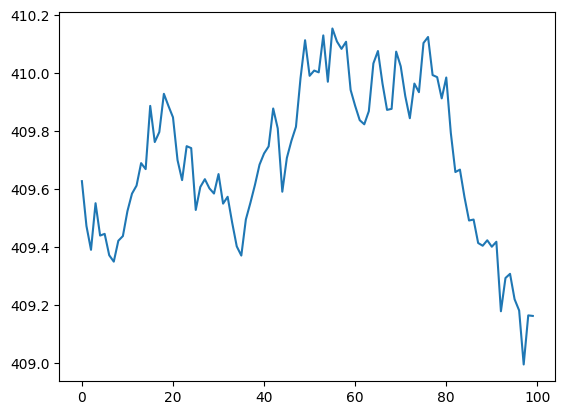

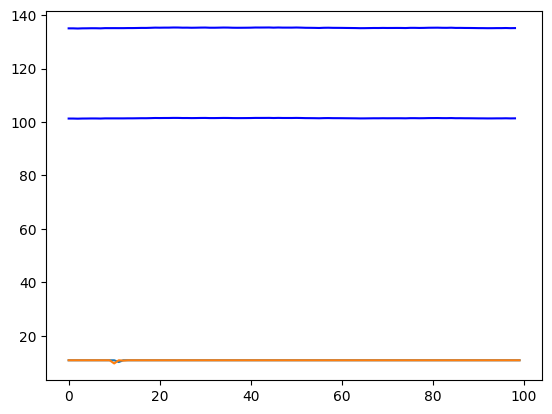

In [172]:
import matplotlib.pyplot as plt
plt.plot(u_history[-100:])
plt.show()

plt.plot(q1_history[-100:])
plt.plot(q2_history[-100:])
plt.plot([cournot(u_history[-i],v,w,n).qc for i in range(1,100)],c='b')
plt.plot([cournot(u_history[-i],v,w,n).qm for i in range(1,100)],c='b')
plt.show()

In [154]:
def boltzmann_action_probs(Q, state, temperature):
    # compute the modified probabilities of each action using the Boltzmann distribution
    max_Q = np.max(Q[state])
    logits = (Q[state] - max_Q) / temperature
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits)
    return probs

for state1 in range(0,num_states1*num_states2):
    print(np.round(boltzmann_action_probs(Q1, state1, temperature),4))

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0

In [161]:
# impulse response
num_episodes = 20
state1 = 0
state2 = 0
q1_impulse=[]
q2_impulse=[]
for episode in range(num_episodes):
    u = shock_space[5]
    u_idx = 5
    if episode == 0:
        action1 = boltzmann_action_selection(Q1, state1,temperature)
        action2 = 2
    else:
        action1 = boltzmann_action_selection(Q1, state1,temperature)
        action2 = boltzmann_action_selection(Q2, state2,temperature)

    quantity1 = action2quantity[action1]
    quantity2 = action2quantity[action2]

   # take the selected action and observe the next state and reward
    next_state1 = 10*action2+u_idx
    next_state2 = 10*action1+u_idx

    # rewards
    reward1 = cournot(u,v,w,n).profit(quantity1,quantity2)
    reward2 = cournot(u,v,w,n).profit(quantity2,quantity1)

    # move to the next state
    state1 = next_state1
    state2 = next_state2

    # update temperature
    temperature = max(min_temperature, temperature * temperature_decay)
    eps = max(min_eps, eps * eps_decay)
    
    q1_impulse.append(quantity1)
    q2_impulse.append(quantity2)

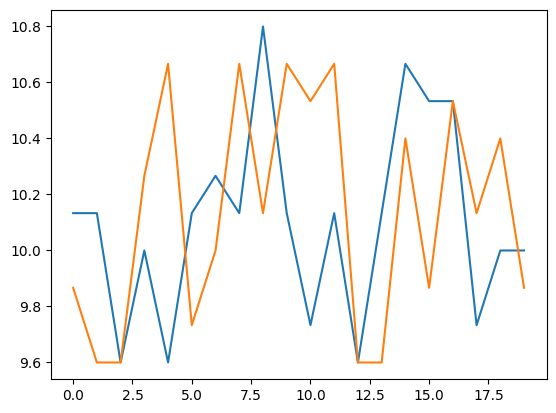

In [162]:
import matplotlib.pyplot as plt
plt.plot(q1_impulse)
plt.plot(q2_impulse)
plt.show()